# 1.基础操作

## 1.1 导入数据

In [ ]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

#Read csv file
df = pd.read_csv("https://raw.githubusercontent.com/Apress/data-analysis-and-visualization-using-python/master/Ch07/Salaries.csv")

## 1.2 Data Frame Attributes: `df.attribute`

In [ ]:
#看列的data type
df['salary'].dtype  #看某列的data type
df.dtypes #看全部列的data type

df.columns #看列名
df.axes  #看行和列标签，以及它们的数据类型
df.ndim  #数据维度，通常是2（行列，二维数据）
df.shape  #数据维度，例如`(10, 5)`表示数据框有10行和5列
df.size  #数据框中的单元格数量
df.values #提取df的数值


**Native Python Type** => **Pandas Type**  

string => string

int => int64

float => float

## 1.3 Data Frame Methods: `df.method()`

In [ ]:
#看哪几行/列
df.tail()
df.head(3)
df = pd.DataFrame({'animal': ['bee', 'zebra', 'whale']})

#看统计数据
df.max()
df.min()
df.mean()
df.median()`
df.std()
df.describe() #统计性描述数据Statistical description

df.sample([n]) #returns a random sample of the data frame
df.dropna()
df.count()

## 1.3 Prepossessing

In [ ]:
# In this case we use Sklearn's Column transformer in our preprocessor function

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Preprocess data using sklearn's Column Transformer approach

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), #'imputer' names the step
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']

# Replacing missing values with Modal value and then one-hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Final preprocessor object set up with ColumnTransformer...

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# fit preprocessor to your data
preprocess = preprocess.fit(X_train)




In [ ]:
# Here is where we actually write the preprocessor function:

# Write function to transform data with preprocessor
# In this case we use sklearn's Column transformer in our preprocessor function

def preprocessor(data):
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

## 1.4 处理数据

### Filtering

In [ ]:
df2=df.head(50)  #创建一个新DataFrame
df2.mean(numeric_only=True) #忽略非数值列，只计算数值列的均值
 #或直接
 df.head(50).mean(numeric_only=True)

#类似的
y=df['salary']
y.mean()
 #直接
 df['salary'].mean() 或 df.salary.mean()
 #pd有一个名为"rank"的属性，所以要选择一个列名为"rank"的列，我们应该使用 `df['rank']`

### Group

In [ ]:
df_rank = df.groupby(['rank'])  #Group data using rank
df_rank.mean()  #算三种rank的教授（AssocProf，AsstProf，Prof）的phd，service，salary平均值

df.groupby('rank')[['salary']].mean() #算三种rank的教授（AssocProf，AsstProf，Prof）的salary平均值

#一般形式
result = df.groupby(['grouping_column'])[['aggregated_column']].aggregation_function()

### Slicing

In [ ]:
df_sub = df[0:4]

#基于行的切片
df[0:4]  #切片操作，从第0行（包括）到第4行（不包括）
df[:n] #从第0行（包括）到第n行（不包括）
df[-n:] #选择最后n行

#基于列的切片
df['salary']  #返还结果是一个series
df[['rank','salary','sex']]  #返还结果是一个data frame

#条件切片
df[df['salary'] < 120000 ] #选取 salary<2000 的 row
df[(df['column1'] > value) & (df['column2'] < value)] #使用多个条件筛选行
df['sex'] == 'Male' #选取 sex=mal 的 row

`>` greater; `>=` greater or equal;

`<` less; `<=` less or equal;

`==` equal; `!=` not equal;

#### Loc
基于行和列的切片
=> df.loc（包含结束标签） 或 df.iloc（含结束标签）

In [ ]:
#loc 标签定位，右闭（包括切片的结束标签）
df.loc[10:13,['salary','phd','rank']] #选取第10行（包括）到第13行（包括），选取'salary'、'phd' 和 'rank' 列。

#iloc 整数位置定位，右开（不包括切片的结束位置）
df.iloc[10:13,[0, 3]] #选取第10行（包括）到第13行（不包括），选取第0列和第3列

 df.iloc[3]
 df.iloc[-3]
 df.iloc[10:13] #选取第10行（包括）到第13行（不包括）

 df.iloc[:, 0]
 df.iloc[:, -1]
 df.iloc[:, 0:3]  #选取第0列（包括）到第3列（不包括）

 df.iloc[1:5, 0:2]
 df.iloc[[0,5], [1,3]]

### Sort

In [ ]:
df_sorted = df.sort_values(by ='service') #创建一个新的data frame，service升序
df_sorted = df.sort_values(by =['service', 'salary'], ascending = [True, False]) #service升序和salary降序

### Adding Value

In [ ]:
df['imaginary_numbers'] = df['lat'] + df['long'] + 1  #新值 = lat值 + long值 + 1

df['southern_oecd'] = (df.lat<0) & (df.oecd==True)  #新值=True iff df.lat<0 且 df.oecd==True

### Missing Value

In [ ]:
df_cleaned = df.dropna() #删除缺失值
df_cleaned = df.dropna(how='all') #删除所有值都缺失的行
df_cleaned = dropna(axis=1, how='all') #删除全是缺失值的列（axis=0表示删除行，axis=1表示删除列）
df_cleaned = dropna(thresh=5) #保留至少有5个非缺失值的行，axis=0，如果要删除列则为 dropna(axis=1，thresh=5)

df_cleaned = fillna(0) #所有缺失值替换为0
df_cleaned = isnull() #返回数据框，其中True表示是缺失值
df_cleaned = notnull() #返回数据框，其中True表示是非缺失值

Rename

In [ ]:
df.rename(columns={'lat':'latitude'}, inplace=True)

inplace=True是一个可选参数
*   True，则表示直接修改df
*   False，则会返回一个新的df，原始的df不会被修改

在 Pandas 中，许多方法（如 rename、drop、fillna 等）默认情况下会返回一个新的 DataFrame，而不是直接修改原始的 DataFrame。这是因为 Pandas 鼓励不修改原始数据，以便保留原始数据的副本，以及在处理大型数据集时避免意外的数据丢失。
但是，有时候您可能希望修改原始 DataFrame 而不是创建一个新的副本。这时就可以使用 inplace=True 参数，将修改应用于原始 DataFrame，而不返回一个新的 DataFrame。


### Join

In [ ]:
#join函数，默认how=left，缺失值用NaN填充
left.join(right) #按照left数据框的索引（或列）与right数据框的索引（或列）进行连接，

left.join(right, how = 'right')  #约等于right.join(left)

![joins](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

### Merge

In [ ]:
left.merge(right) #Merge执行了a left join，但是默认情况下没有使用index引作为连接的键key，而是使用它们共有的列E作为连接的key



### Append

In [ ]:
my_coords = (51.88999644,1.476164762)
my_country = pd.Series({'name':'Sealand','region':'europe','oecd':False,'g77':False,
                        'latitude':my_coords[0], 'long':my_coords[1],'income2017':'low',
                        'imaginary_numbers':my_coords[0]+my_coords[1],'southern_oecd':False})
#建了一个名为 my_country 的 pandas Series 对象，包含各种属性（'name' = 'Sealand'，etc.）

df = df.append(my_country,ignore_index=True)
#将一个名为 my_country 的 Series 对象追加到df中，并使用 ignore_index=True 来获得连续的整数索引

### Preprocessor with ColumnTransformer and Pipeline

In [ ]:
# In this case we use Sklearn's Column transformer in our preprocessor function

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Preprocess data using sklearn's Column Transformer approach

# numerical data整理，缺失值用median代替
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), #'imputer' names the step
    ('scaler', StandardScaler())])
# categorical data整理，缺失值用mode （most_frequent）
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# 合并preprocessor with ColumnTransformer...
preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# fit preprocessor to your data
preprocess = preprocess.fit(X_train)

# 之后 X_train 变成了 preprocessor(X_train))
def preprocessor(data):
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data
# 再处理就用 model.fit(preprocessor(X_train), y_train_labels)

## 1.5 Plotting

In [ ]:
%matplotlib inline #用于在Jupyter Notebook中嵌入图形输出
from matplotlib import pyplot as plt

### Line Chart

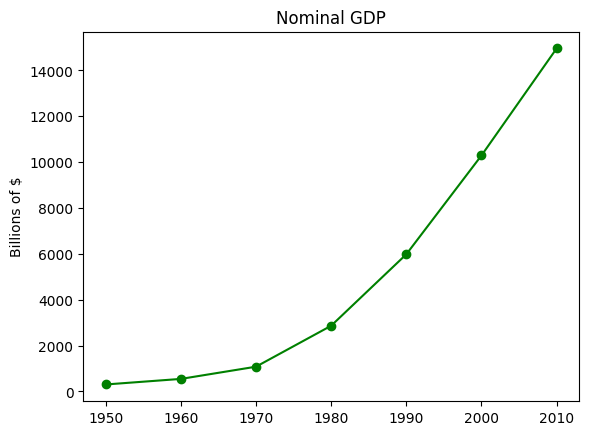

In [ ]:
years=[1950,1960,1970,1980,1990,2000,2010]
gdp=[300.2,543.3,1075.9,2862.5,5979.6,10289.7,14958.3]

plt.plot(years,gdp,color='green',marker='o',linestyle='solid')  #创建Line Chart，years在x轴，gdp在y轴
plt.title("Nominal GDP")  #加标题
plt.ylabel("Billions of $")  #y轴加单位
plt.show() #画图

### Bar Chart

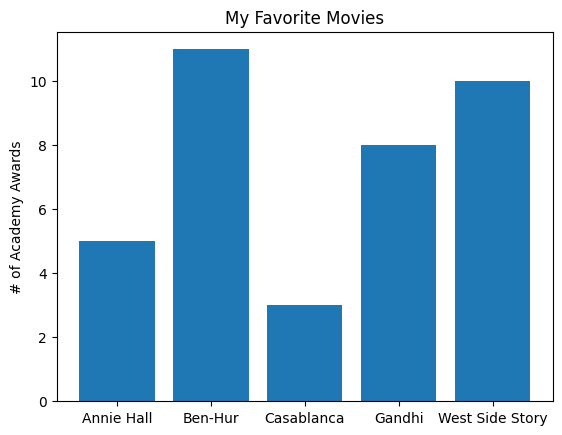

In [ ]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

plt.bar(movies,num_oscars) #创建Bar Chart，这个代码将在x轴上以电影名称为标签，y轴上以奥斯卡奖项数量为高度
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
plt.show()

### Histogram

Text(0, 0.5, 'Count')

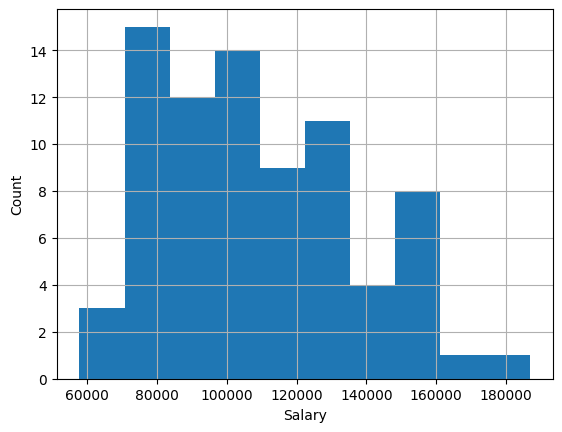

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Apress/data-analysis-and-visualization-using-python/master/Ch07/Salaries.csv")

df['salary'].hist()  #创建Histogram，因为是data frame所以需要加df.，之前movies是series所以不需要加
plt.xlabel('Salary')
plt.ylabel('Count')

### Scatterplots

Text(0, 0.5, 'Years since PhD')

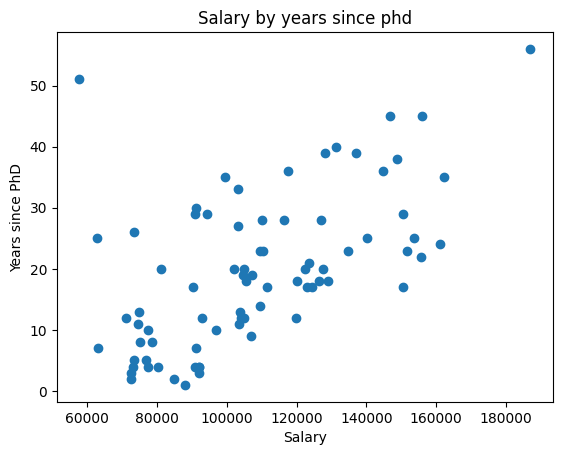

In [ ]:
plt.scatter(df['salary'], df['phd'])  #创建Scatterplots
plt.title("Salary by years since phd")
plt.xlabel("Salary")
plt.ylabel("Years since PhD")

### Pairplots

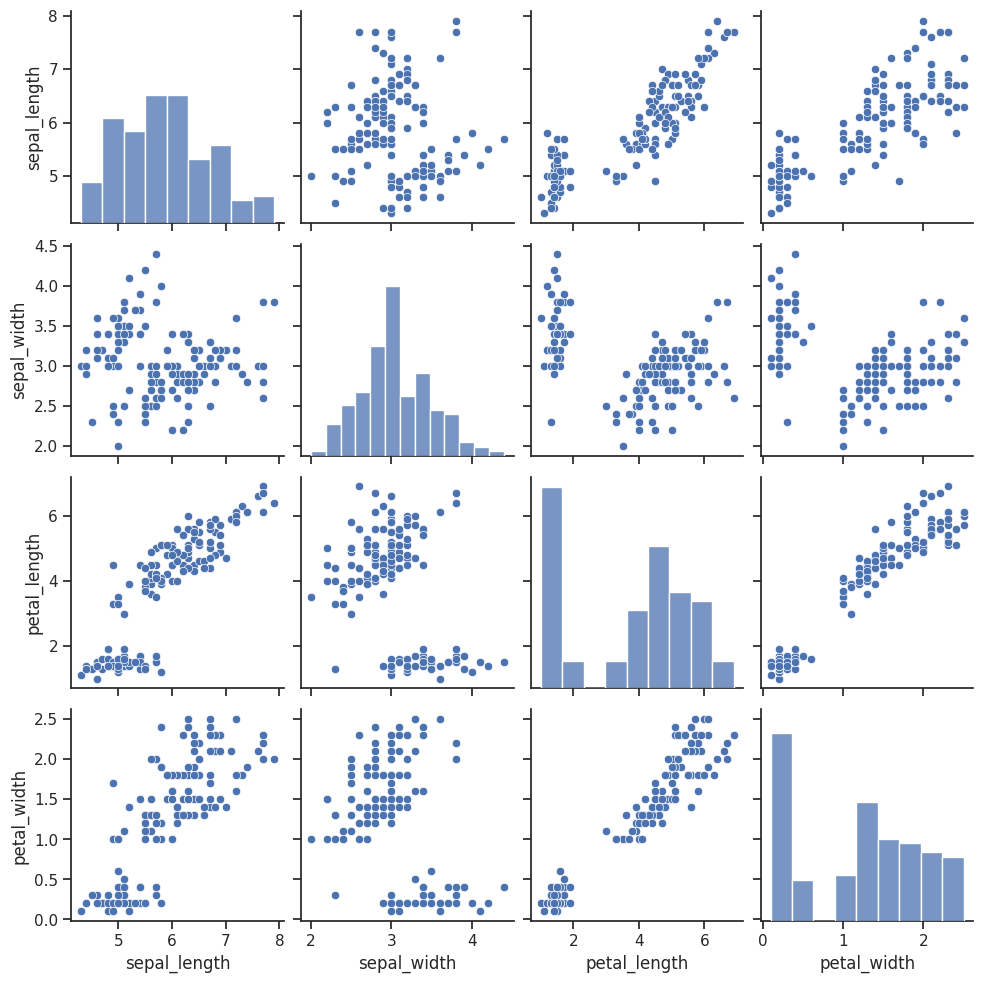

In [ ]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)  #设置Seaborn图形的样式，包括使用小刻度线（"ticks"）和颜色编码
iris = sns.load_dataset("iris")  #从Seaborn自带的数据集中加载了Iris数据集

g = sns.pairplot(iris) #创建Pairplots，一个矩阵，其中包含数据集中的各个特征之间的散点图

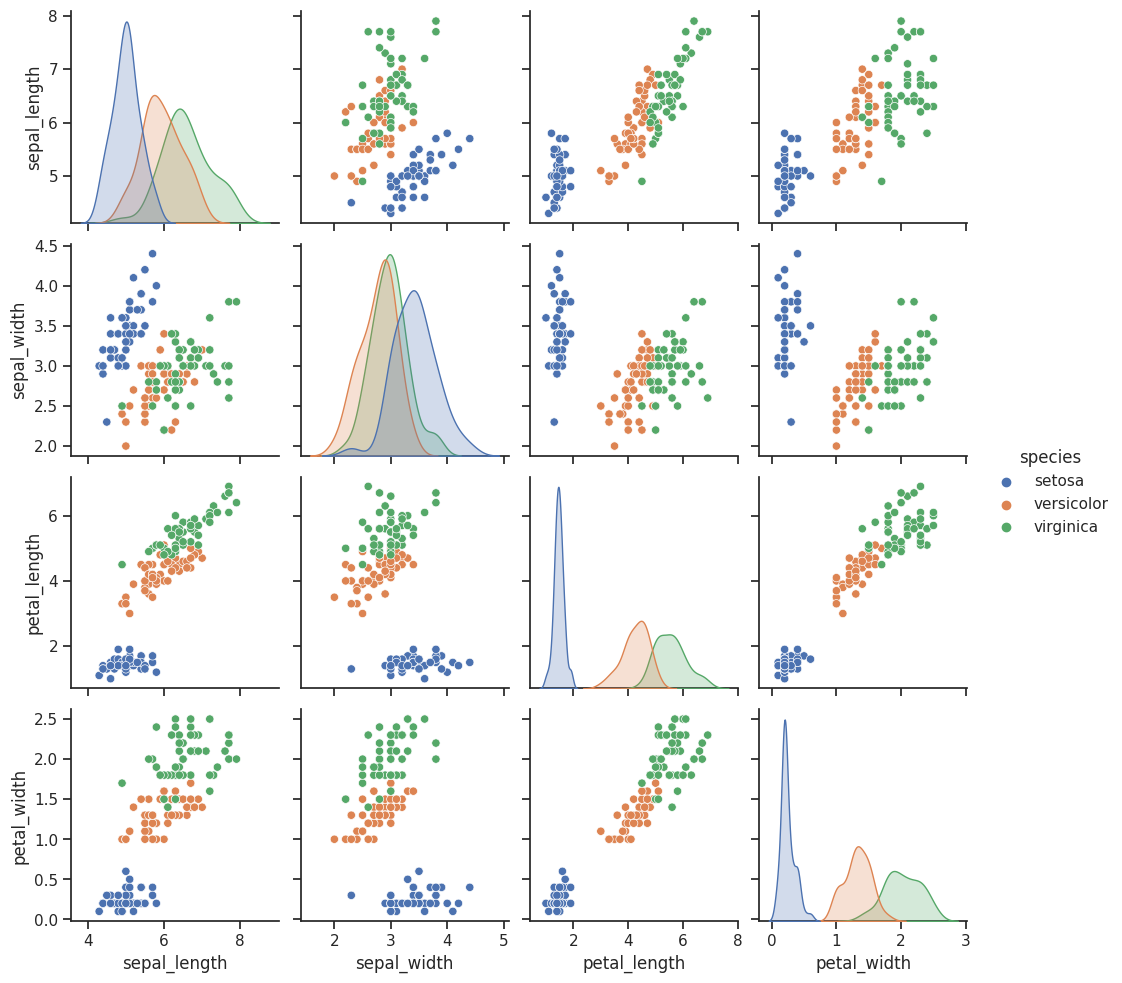

In [ ]:
g = sns.pairplot(iris, hue="species")  #Hue指颜色属性，用于对数据进行分组或着色

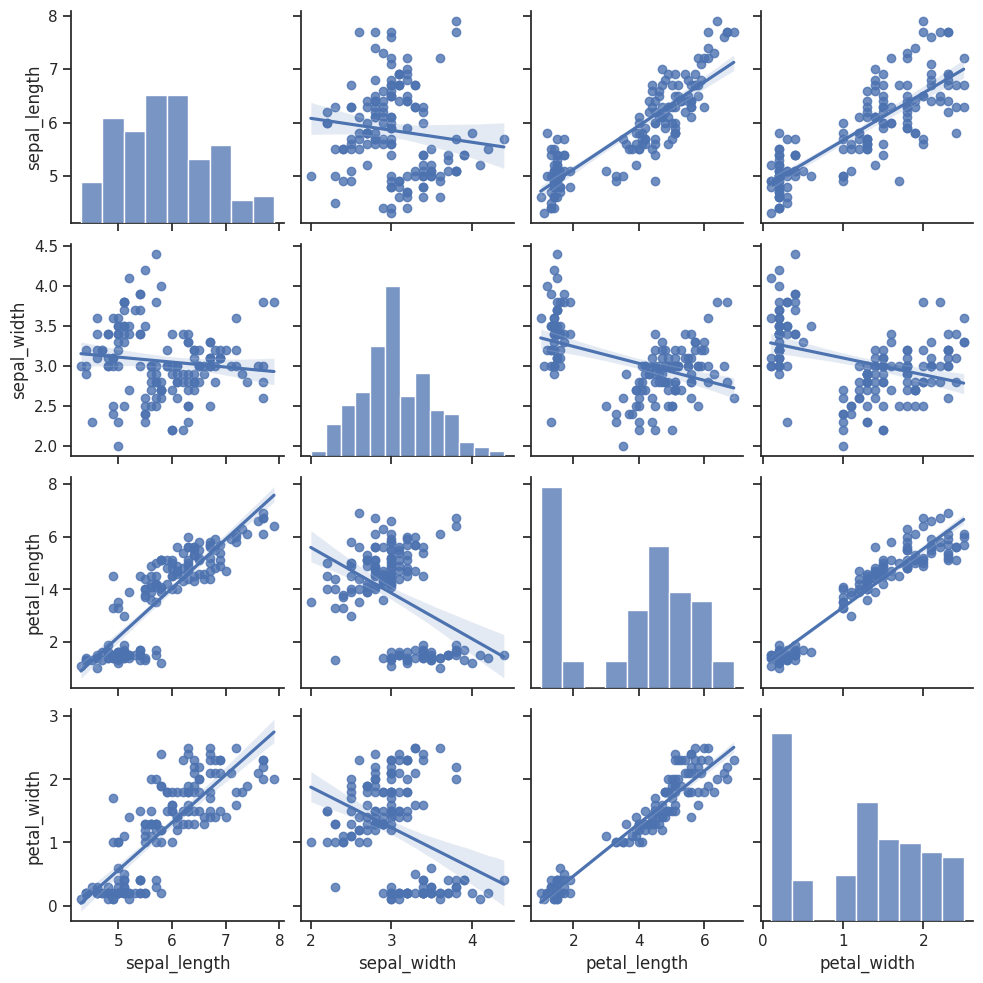

In [ ]:
g = sns.pairplot(iris, kind="reg") #在图上添加回归线

# SUPERVISED LEARNING

# 2.Regression&Classification_KKN and CV
KNN的K值通常通过CV来选择，用于regression和classification

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/jolars/MARsolutions/master/data/MichelinNY.csv", encoding="latin")
y = data['InMichelin']
X = data.loc[:, data.columns != 'InMichelin']

## 2.1 Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3) #默认.75/.25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3) #设置.5/.5 split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, stratify=y) #stratified CV

## 2.2 KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) #set k=5
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test)) #KNN model 的score

y_pred = knn.predict(X_test) # y_pred includes your predictions
y_pred

## 2.3 Using Cross validation for model evaluation

In [ ]:
# import cross validation functions from sk learn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# 设置model系数和print结果
kfold = KFold(n_splits=5) #5个folds
print("KFold: "+str(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=kfold).mean())) #平均得分
print("KFold: "+str(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=kfold))) #5个folds的分别

skfold = StratifiedKFold(n_splits=5, shuffle=True)
print("StratifiedKFold: {}".format(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=skfold).mean()))

rkf = RepeatedKFold(n_splits=5, n_repeats=10)
print("RepeatedKFold: {}".format(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train,  cv=rkf).mean()))[ ]

## 2.4 Tuning models with grid search


最后的final model要用GridSearchCV

### Grid Search with CV using loop

In [ ]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)
cross_val_score = [] #创建一个空列表cross_val_scores，用于存储不同K值的K最近邻模型的交叉验证分数

for i in neighbors: #使用一个for循环遍历neighbors中的不同K值。对于每个K值，执行以下步骤：
  knn = KNeighborsClassifier(n_neighbors=i) #创建一个K最近邻分类器（KNeighborsClassifier）并将K值设为当前循环的i
  score = cross_val_score(knn, X_train, y_train, cv=10) #使用cross_val_score函数对K最近邻模型进行10folds交叉验证，得到10folds交叉验证的性能分数，将这些分数存储在score中
  cross_val_score.append(np.mean(scores)) #计算这10次交叉验证分数的平均值，然后将平均值添加（append）到cross_val_scores列表中。


print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)] #argmax函数返回使cross_val_scores中的值最大的元素的索引;neighbors[...]使用上一步得到的最大值索引，从neighbors数组中获取对应的K值。
print("best_n_neighbors: {}".format(best_n_neighbors))

knn = KNeighborsCVlassifier(n_nerighbors=best_n_neighbors) #设置k值为best_n_neighbors
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test))) #看score

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

param_grid = {'n_neighbors': np.arange(1,15,2)} #定义了一个字典param_grid，其中包含了一个名为n_neighbors的超参数和一个对应的值；np.arange(1,15,2)表示从1开始，以步长2递增，直到小于15为止（生成的数组是 [1,3,5,7,9,11,13]，这些值将用于尝试不同的K值来寻找最佳的K值）


grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10) #grid自定义的变量名；GridSearchCV工具名；KNeighborsClassifier使用KNN模型；param_grid使用之前定义的K值字典；cv=10表示10folds
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))




### KNN，ridge，lasso有gridsearch，ols没有

# 3.Regression_Linear&Ridge&Lasso Regression




In [ ]:
import pandas as pd
data = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv")

# clean up data and prep for linear regression
data = data.iloc[:, 1:] # delete first column
y = data['medv'] # median value of homes
X = data.loc[:, data.columns != 'medv']

# train test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression() # 创建一个变量lr，用于储存线性回归模型
lr.fit(X_train, y_train) # 拟合模型

print(X_train.columns)  # X_train.columns是DataFrame中的属性，它返回DataFrame中所有特征列的名称
print("lr.coef_: "+str(lr.coef_))  # lr.coef_是线性回归模型的系数
print("lr.intercept_: {}".format(lr.intercept_))

# 用r square看model performace
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring="r2")))  #用LinearRegression()模型，看r2系数



In [ ]:


import statsmodels.api as sm
X_train_new = sm.add_constant(X_train)  #statsmodel需要添加一个常数列（通常为1）
model = sm.OLS(y_train, X_train_new).fit()   #用ols模型
model.summary() #生成回归模型的摘要报告




## 3.1 Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

## 3.2 Lasso Regression

In [ ]:
np.sum(lasso.coef_!=0)

from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print("lasso.coef_: {}".format(lasso.coef_))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=100, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

In [ ]:
# top_feature




# 4.Classification_Logistic Regression

## 4.1 SK或SM run Logistic Regression

In [ ]:
#用sk
import pandas as pd
data = pd.read_csv("http://gattonweb.uky.edu/sheather/book/docs/datasets/MichelinNY.csv", encoding="latin_1")

#clear data
data = data.loc[:, data.columns != 'Restaurant Name'] #update data to set up for train test split, remove Restaurant Name column
y = data['InMichelin']
X = data.loc[:, data.columns != 'InMichelin']

#Set up training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='none').fit(X_train, y_train) #set penalty to none since we are starting with non penalized logit, L1 and L2 are other options
print("logreg.coef_: {}".format(logreg.coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

#看prediction的y
predicted_vals = logreg.predict(X_test) # y_pred includes your predictions
print("logreg.predict: {}".format(predicted_vals))

In [ ]:
#用sm
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train)

model = sm.GLM(y_train, X_train_new, family=sm.families.Binomial()).fit() #Generalized Linear Model，加binomial等于logistic
model.summary()

## 4.2 Logistic Regression with constraints on size of coefficients

### C选不同的值

In [ ]:

logreg = LogisticRegression(C=100, penalty='l2').fit(X_train, y_train) # C = 100, compare coefs to regular model above.

print("logreg .coef_: {}".format(logreg .coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test) # y_pred includes your predictions
print("logreg.predict: {}".format(predicted_vals))

In [ ]:
logreg = LogisticRegression(C=1, penalty='l2').fit(X_train, y_train) #Now change to C=1, compare coefs to above models.

print("logreg .coef_: {}".format(logreg .coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

In [ ]:
logreg = LogisticRegression(C=.0001, penalty='l2').fit(X_train, y_train) #Now make C even smaller.  Set C=.0001, compare coefs to above models. Does the model's prediction power get better or worse??

print("logreg .coef_: {}".format(logreg .coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

### penality = L1（Lasso） or L2（Ridge）

In [ ]:
#用L1 penalty 和 'liblinear' solver.（对于L1正则化，通常建议使用'liblinear'求解器，因为它能够有效地处理L1正则化并执行特征选择）
logreg = LogisticRegression(C=.01, penalty='l1',solver='liblinear').fit(X_train, y_train)

print("logreg .coef_: {}".format(logreg .coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict_proba(X_test) # y_pred includes your predictions
print("logreg.predict: {}".format(predicted_vals))

#L1正则化倾向于产生稀疏模型，即只有一部分特征对预测起作用，而其他特征的系数被设为零。
#L2正则化倾向于产生非稀疏模型，它可以帮助平滑模型的系数，防止过拟合，但不会自动执行特征选择。

## 4.3 Multiclass models (Multinomial model)

In [ ]:
from sklearn.datasets import load_iris #看花的features推是什么种类
import numpy as np

iris = load_iris()
iris
X, y = iris.data, iris.target

logreg = LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=10000).fit(X,y) #multi_class="multinomial"表示多类别逻辑回归（鸢尾花数据集有三个不同的类别，setosa、versicolor、virginica）；solver="lbfgs"是一种常用的优化算法；max_iter=10000定义最大迭代次数
print(logreg.predict(X))

# calculate each probability
from math import exp
p1 = exp(1) / (exp(1) + exp(3) + exp(2))
p2 = exp(3) / (exp(1) + exp(3) + exp(2))
p3 = exp(2) / (exp(1) + exp(3) + exp(2))
print(p1, p2, p3)
print(p1 + p2 + p3) #等于1

# 5.Regression&Classification_Decision Tree and Random Forest

## 5.1 Decision Tree

In [ ]:
%matplotlib inline
#需要单独一行 用于在Jupyter Notebook中嵌入图形输出
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs #是一个用于生成虚拟数据集的函数，通常在机器学习和数据分析中用于示例和实验
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0) #300个数据，生成4个簇

print(X[0:5,:]) # X前五行数据
print(y[0:5]) # y的前5个类别标签
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow') #画散点图

### Classification

In [ ]:
# 用`DecisionTreeClassifier`来进行分类
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
model = tree.fit(X,y)
print(model)

### Regression

In [ ]:
#Set up training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=42)
regressor = DecisionTreeRegressor(random_state=0)
model = regressor.fit(X_train,y_train) #默认criteria是mse
model.score(X_test,y_test) #越接近0表示model约差

### print最重要的features

In [ ]:
# 方法一
print(model.feature_importances_)
#in same order as feature names in data
diabetes.feature_names

# 方法二
print(formodel.feature_importances_)
#in same order as feature names in data
data.columns


## 5.2 Random Forest

### Classification

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
model.score(Xtest,ytest) #看accuracy分数

In [ ]:

from sklearn import metrics
print(metrics.classification_report(ypred, ytest)) #看precision，recall，F1分数

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label'); #画confusion matrix

### Regression

In [ ]:
forest = RandomForestRegressor(n_estimators=200, max_features=3)

# 5.Ensemble Model
集合模型

## 5.1 Bagging

### Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier() #tree 是为DecisionTreeClassifier这个分类器对象选择的变量名，需要先instantiate a model type for bagging first
bag = BaggingClassifier(tree, n_estimators=100, random_state=1)
bag.fit(X, y)

### Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

tree = DecisionTreeRegressor()
bag = BaggingRegressor(tree, n_estimators=100, random_state=1)
bag.fit(X_train,y_train)

## Gradient Boosted Trees (Boosted)

### Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, random_state=0)

model = GradientBoostingRegressor(n_estimators=100, max_depth=2, learning_rate=.01)
modelfit = model.fit(Xtrain,ytrain)
print(modelfit)
print(modelfit.score(Xtest, ytest)) #如果score分数不高，增加n_estimators

In [ ]:
#learning_rate较小（例如，0.001），表示每棵树的贡献较小，需要更多的树来拟合数据，训练时间更长，但有可能得到更好的泛化性能
model = GradientBoostingRegressor(n_estimators=5000, max_depth=2, learning_rate=.001)
modelfit = model.fit(Xtrain,ytrain)
print(modelfit.score(Xtest, ytest))

### Classification

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

#make some data
X, y = make_hastie_10_2(n_features=10, random_state=0) #创建了一个合成的二分类数据集，这个数据集包含了10个特征（10维特征空间，默认）
X_train, X_test = X[:2000], X[2000:] #前2000个样本（行）是training，后2000个样本是tet
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=10000, learning_rate=.01, max_depth=1, random_state=0).fit(X_train, y_train) #clf通常是"分类器"（Classifier）的缩写
clf.score(X_test, y_test)

In [ ]:
clf.feature_importances_ #extract important features:

巴拉巴拉

In [ ]:
# 建立多个classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# **硬投票策略**
log_clf = LogisticRegression(random_state=42) # logistic regression w/ C=default
rnd_clf = RandomForestClassifier(random_state=42) # Random Forest
svm_clf = SVC(random_state=42) # support vector machine

# 选取一个选择最终模型的标准
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard') #硬投票策略是指每个基本分类器投票，最终分类结果是获得最多投票的类别

#创建组合模型
vmodel = voting_clf.fit(X_train, y_train)
print(vmodel.score(X_test, y_test)) #查看voting classifier的accuracy





In [ ]:
# **软投票策略**



log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

In [ ]:
# 和individual models比较accuracy
log_clf = LogisticRegression(random_state=42) # logistic regression w/ C=default
rnd_clf = RandomForestClassifier(random_state=42) # Random Forest
svm_clf = SVC(random_state=42) # support vector machine

print(log_clf.fit(X_train, y_train).score(X_test, y_test))
print(rnd_clf.fit(X_train, y_train).score(X_test, y_test))
print(svm_clf.fit(X_train, y_train).score(X_test, y_test))


# 6.Model Evaluation Metrics

## 6.1 Classification

### Accuracy

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 1, 1, 1]
y_true = [1, 1, 1, 0] #用y_test进行比较

print(accuracy_score(y_true, y_pred)) #准确率， normalize的default=True
print(accuracy_score(y_true, y_pred, normalize=False)) #准确预测的样本个数

Accuracy = TP + TN / TP + TN +FP +FN, 但有imbalanced data时候不准确

一般更倾向于用 F1 score 和 AUC (the ROC area under the curve) instead

### Confusion Matrix （TP FN FP TP）

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
mat = confusion_matrix(y_true, y_pred) #predicted y on test y
print(mat)

结果是

  [[TP FN]
  
  [FP TP]]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, square=True, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

![image.png](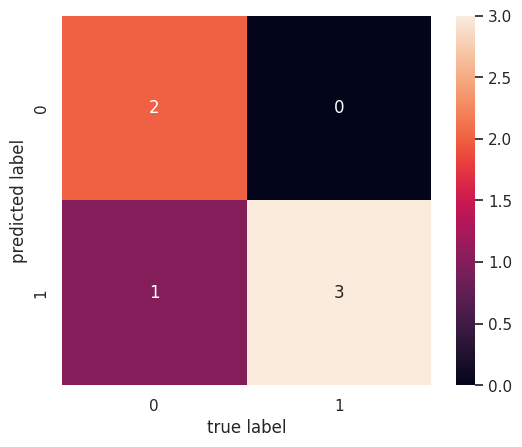
)

### Precision, Recall, F1

In [ ]:
from sklearn.metrics import classification_report

y_true = [0, 1, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() #将多维数组（例如二维矩阵）转换为一维数组
tn, fp, fn, tp #print 四个值

target_names = ['class 0', 'class 1'] #'class 0' 和 'class 1' 被用作类别的标签
print(classification_report(y_true, y_pred, target_names=target_names)) #print classification report

minimize FP => 希望Precision等于1

minimize FN => 希望Recall等于1

F1 = 2 * (precision * recall) / (precision + recall), F1高  if Precision 和 Recall 都很高

### ROC AUC

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
y_true = [0, 1, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0]

mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, square=True, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

accuracy_score(y_true, y_pred) #print accuracy score

import numpy as np
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_true, y_pred)) #print ROC AUC（Receiver Operating Characteristic Area Under the Curve）分数
#ROC AUC分数越高越好，有考虑到imbalanced data

### 在cross_val_score和GridSearchCV中使用上述Scoring Argument

In [ ]:
#自己set up scoring argument
from sklearn.metrics import log_loss, make_scorer
log_loss_scorer = make_scorer(log_loss)
grid = GridSearchCV(LogisticRegression(), param_grid={'C': [1, 10]}, scoring=log_loss_scorer )

#用现有的 scoring argument
grid = GridSearchCV(LogisticRegression(), param_grid={'C': [1, 10]}, scoring="f1_score")

## 6.2 Regression

### Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

MSE =

Sum((yi-yhat)^2) /(number of observations)

Corrects RSS for number of observations


### Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

### Median Absolute Error

In [ ]:
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

### R2

In [ ]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

# UNSUPERVISED LEARNING

# 7.Principal Component Analysis  

implement PCA from scratch using numpy (no baby wheels)见week9讲义


In [ ]:
%matplotlib inline
#魔法命令（Magic Command），用于指示Jupyter Notebook在单元格中绘制的图形将直接显示在单元格输出下方，而不是在独立的窗口中显示。这样可以方便地在笔记本中查看和分析图形。
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 7.1 PCA模型创建和可视化

In [ ]:
# PCA模型
from sklearn.decomposition import PCA
pca = PCA(n_components=k) #将数据集X降维为仅包含k个主成分
pca.fit(X)
X_pca = pca.transform(X)
print('data has shape', X.shape) #原shape，(1797, 64)
print('transformed data has shape', X_pca.shape) #transform后的shape，(1797, 10)

print('主成分系数矩阵是：', pca.components_) #在新的特征空间中的方向
print('特征值:', pca.explained_variance_) #从主成分等于1开始，方差越大，主成分对数据的解释能力越强
print('方差解释率：', pca.explained_variance_ratio_) #从主成分等于1开始，方差比例
print('sum of explained variance ratio:', sum(pca.explained_variance_ratio_))

#将PCA将降维后的数据反向转换成原始的数据，重建出近似于原始数据的矩阵。这在一些应用中非常有用，例如降噪、特征工程、可视化等。
X_inverse = pca.inverse_transform(X_pca)
print('inverse transformed data has shape', X_inverse.shape)  #返回原始数据，(1797, 64)

In [ ]:
# visualize PCA
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

## 7.3 降低维度

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X) # create X data with single pca vector
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

In [ ]:
print(X[0:5,:]) #original data
print(X_pca[0:5,:]) #data transformed to a single pca vector

In [ ]:
X_new = pca.inverse_transform(X_pca) # inverse_transform returns pc vector to original matrix
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

## 7.3 PCA Example: Hand-written digits


In [ ]:
# 导入数据
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

In [ ]:
#  随机生成数据集X
rng = np.random.RandomState(1) #创建了一个伪随机数生成器Pseudo-Random Number Generator，使用了NumPy的RandomState对象，随机种子是1
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T #生成了一个二维数据集X，
# rng.rand(2, 2)：使用rand()方法生成一个2x2的随机矩阵，其中的值在0和1之间均匀分布。
# rng.randn(2, 200)：这里使用randn()方法生成一个2x200的随机矩阵，其中的值符合标准正态分布（均值为0，标准差为1）。
# np.dot(..., ...).T：然后，将这两个矩阵相乘，并通过.T转置操作，得到一个形状为(200, 2)的数据集X。这个数据集包含200个样本，每个样本有两个特征。
plt.scatter(X[:, 0], X[:, 1]) # X[:, 0]和X[:, 1]分别表示数据集X中的第一个和第二个特征
plt.axis('equal'); #设置图形的x轴和y轴的刻度尺寸相等



In [ ]:
# 因为data是8×8pixel images,表示64-dimensional.
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape) #原data shape
print(projected.shape) #现data shape

In [ ]:
# 画图，彩色的
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## 7.4 Number of components

In [ ]:
np.cumsum(pca.explained_variance_ratio_) #不同数量的variance是多少，越大越好

In [ ]:
# 用图看components和variance的关系
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# 根据想要多少variance找number of components

pca = PCA(0.70).fit(digits.data)
print(pca.n_components_) #70% of variance explained with 9 PCA vectors

pca = PCA(0.80).fit(digits.data)
print(pca.n_components_) #80% of variance explained with 13 PCA vectors

pca = PCA(0.95).fit(digits.data)
print(pca.n_components_) #95% of variance explained with 29 PCA vectors

## 7.5 Noise Filtering

In [ ]:
# 导入无noisy的数据
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

# 加入noisy
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [ ]:
# 看 50% vairance 的 components 有多少
pca = PCA(0.50).fit(noisy)
pca.n_components_

In [ ]:
# 处理带噪音数据并可视化
components = pca.transform(noisy) # 提取出PCA向量（主成分）到一个新的矩阵components中
# create new x matrix without noise
filtered = pca.inverse_transform(components)
# 将主成分components转换回原始的特征空间，从而创建一个新的数据矩阵filtered，其中的噪声被减小或移除，而信号被保留
# 上述pca通过将 n_components 参数设置为0.50，你告诉PCA模型只保留解释50%的数据方差的主成分
plot_digits(filtered) #可视化处理后的数据filtered

## 7.6 PCA example

In [ ]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

<ipython-input-1-46b64150ad6b>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv', index_col=0)
# index_col=0将第一列（索引0）作为行索引，也就是DataFrame的行标签

df.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
# 先标准化预处理，生成新DataFrame X
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns) # 数据预处理的阶段，将df数据标准化后创建一个新的数据帧X，并且保持了原始数据的索引和列名。
# scale函数，标准化（即将数据的均值调整为0，标准差调整为1），应用于原始df中的所有列，即对所有列进行标准化处理
# index函数设置新DataFrame，X，的行索引，与原始DataFrame，df，的行索引相同
# columns函数设置新DataFrame，X，的列标签，它与原始DataFrame，df，的列标签相同

# 主成分矩阵的转置
PCA().fit(X).components_.T
# PCA().fit(X) 将PCA模型应用于数据集X
# .components_ 属性包含了主成分（principal components）的信息
# .T 转置操作

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

In [ ]:
# 创建pca_loadings
# 创建新DataFrame，pca_loadings，包含了PCA模型在数据集X上拟合后的主成分（loading vectors）的信息
# loading vectors是PCA中的系数或权重，它们表示原始特征在每个主成分上的贡献
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [ ]:
# 创建df_plot
# 对原始数据降维
pca = PCA() #创建了一个PCA对象，pca
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
# 对原始数据集X应用PCA方法，将其降维到四个主成分PC1-4
# 并将降维后的数据保存在一个新的Pandas数据框df_plot中
df_plot.head()

,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


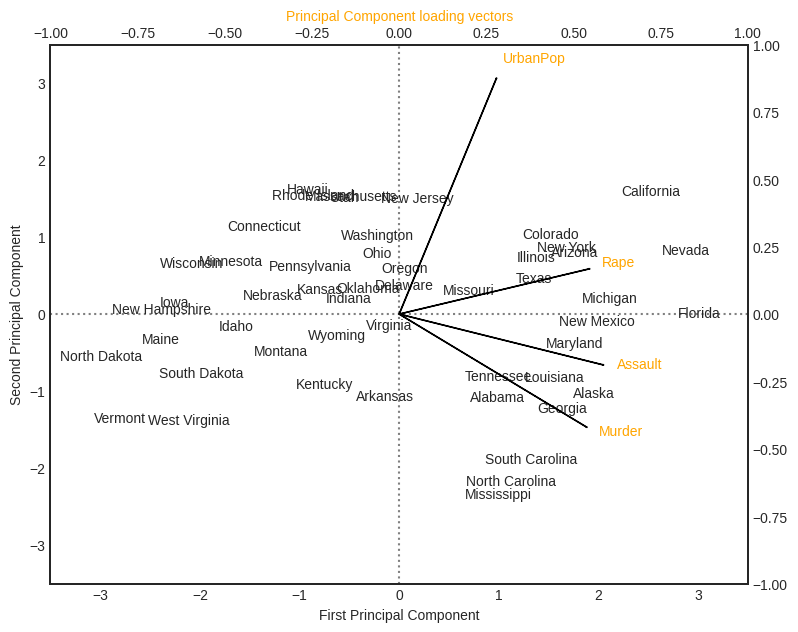

In [ ]:
# 绘制PCA的结果的可视化图

fig , ax1 = plt.subplots(figsize=(9,7))
# plt.subplots()函数创建一个图形fig和一个坐标轴ax1，figsize=(9,7)设置这个图形的大小为9英寸宽和7英寸高
ax1.set_xlim(-3.5,3.5) # 设置x轴的范围从-3.5到3.5
ax1.set_ylim(-3.5,3.5) # 设置y轴的范围从-3.5到3.5

# Plot Principal Components 1 and 2
# 在图形上对每个数据点进行标注
for i in df_plot.index: # 关于上述数据框df_plot的索引(即rownames)的循环
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# ax1.annotate()是一个方法，用于在图形的指定位置添加文本注释
# i是注释的文本内容（rownames）
# (df_plot.PC1.loc[i], -df_plot.PC2.loc[i])确定了要在图上标注文本的位置。
# 数据框df_plot的PC1列，索引为i的值
# 这里，df_plot.PC1.loc[i]是第一主成分的值，而-df_plot.PC2.loc[i]是第二主成分的值，但取了负值。这意味着在y轴上的位置是第二主成分值的相反数。
# ha='center'设置文本在其指定坐标的水平中心对齐。

# 绘制水平和垂直的参考线
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey') # 在y=0的位置绘制一条从x=-3.5到x=3.5的水平线
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey') # 在x=0的位置绘制一条从y=-3.5到y=3.5的垂直线

# 设置坐标轴标签
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# 创建第二个坐标轴ax2
ax2 = ax1.twinx().twiny() # 让ax2有独立的的y轴和x轴

ax2.set_ylim(-1,1) # ax2的y轴显示范围为-1到1
ax2.set_xlim(-1,1) # ax2的x轴显示范围为-1到1
ax2.tick_params(axis='y', colors='orange') # 将ax2的y轴的刻度线颜色设置为橙色
ax2.set_xlabel('Principal Component loading vectors', color='orange') # 设置ax2的x轴标签为橙色Principal Component loading vectors

# 根据V1和V2 plot loading vectors
a = 1.07 # variable a是一个小的偏移参数，用于将箭头的尖端与文本标签分开，以避免它们重叠在一起。
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# 用arrow函数绘制箭头，可视化向量
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);
# (0, 0)是箭头的起始点的坐标，
# pca_loadings.V1[0]和-pca_loadings.V2[0]分别是箭头的水平和垂直分量的末端坐标，0代表第0行




In [ ]:
print('主成分系数矩阵是：', pca.components_) #在新的特征空间中的方向
print('特征值:', pca.explained_variance_) #从主成分等于1开始，方差越大，主成分对数据的解释能力越强
print('方差解释率：', pca.explained_variance_ratio_) #从主成分等于1开始，方差比例
print('sum of explained variance ratio:', sum(pca.explained_variance_ratio_))

主成分系数矩阵是： [[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]
特征值: [2.53085875 1.00996444 0.36383998 0.17696948]
方差解释率： [0.62006039 0.24744129 0.0891408  0.04335752]
sum of explained variance ratio: 0.9999999999999999


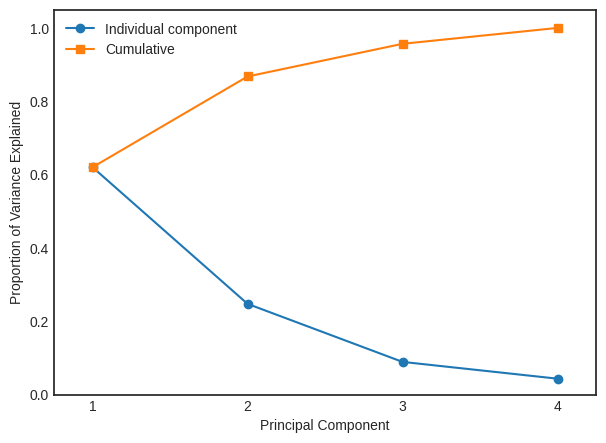

In [ ]:
plt.figure(figsize=(7,5)) #创建图表，指定了图表的大小为7x5英寸。

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
# 绘制了一个折线图，其中x轴表示主成分的序号（1到4），y轴表示每个主成分解释的方差的比例
# -o表示使用圆点和线条来表示数据点，创建图例标签是Individual component
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')
# 绘制了另一条折线，表示累积的方差比例，
# -s表示使用方块和线条来表示数据点，图例标签是Cumulative

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4]) # 将x轴上的刻度设置为[1, 2, 3, 4]。
plt.legend(loc=2); # 添加图例legend，loc=2指定图例位置（左上角）

# 8.K-Means Clustering

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [ ]:
# make_blobs函数来生成一个虚拟的数据集，并可视化
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

## 用heatmap看correlation

In [ ]:
# use a heatmap to see the correlation between columns
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('correlation between columns')

## 8.1 Visualization

In [ ]:
# K-means Clustering模型
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X) #得到每个样本点所属的簇标签
kmeans.predict(X) #知道一个新的样本点应该被分配到哪个簇

print(y_kmeans[0:4]) #打印输出上述数据 kmeans.predict(X) 前4个元素

print(kmeans.cluster_centers_) #打印出final cluster centroid locations

In [ ]:
#plot original data colored by k-means clusters from model
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis') #plot original data
# X[:, 0], X[:, 1]：将数据集中的第一列作为x轴，第二列作为y轴
# c=y_kmeans：用于为每个数据点分配颜色的数组，y_kmeans 包含了每个样本点所属的聚类簇标签，根据这些标签进行着色。
# s=50：指定散点的大小为50。
# cmap='viridis'：选择了一种颜色映射（colormap），用于表示不同的聚类簇。在这里，使用'viridis' colormap，不同的颜色代表不同的聚类簇。
centers = kmeans.cluster_centers_
#创建新变量centers，用来保存K均值聚类模型 kmeans 中每个聚类簇的中心点的坐标
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
#绘制每个聚类簇的中心点

## 无KMeans模型版

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)  # select a "random state" value randomly
    i = rng.permutation(X.shape[0])[:n_clusters]  # define number of clusters
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [ ]:
#增加至6个cluster
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## 8.2 Evaluating k in kmeans fit with elbow chart

In [ ]:
# Plot reduction in within cluster variation for each k in a series of k means cluster models...

# 创建sample
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow curve')

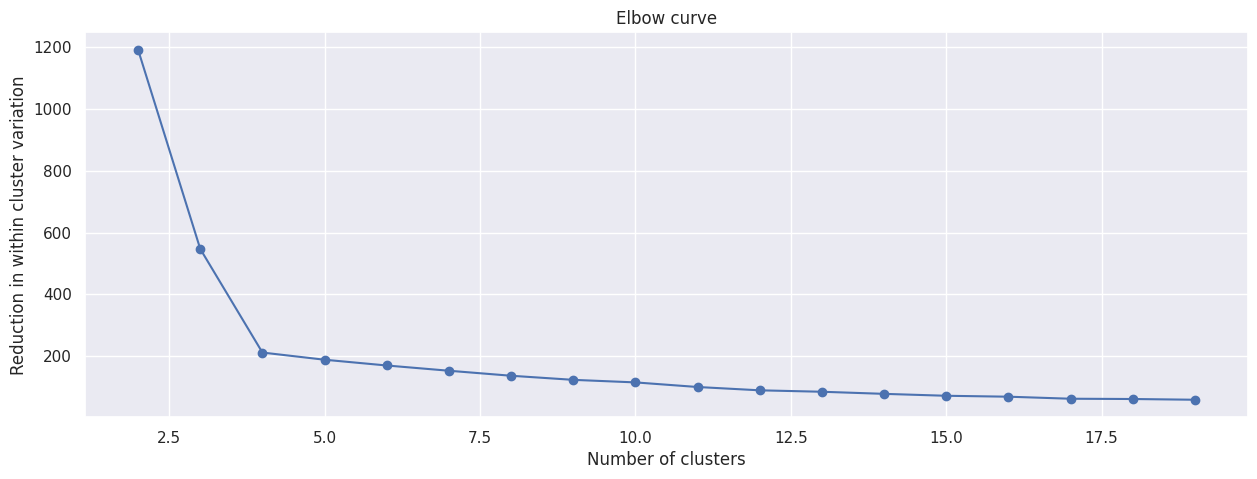

In [ ]:
within_cluster_variance = []
#初始化一个空的列表 within_cluster_variance，用于存储每个K均值聚类模型的簇内方差。

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)
# 对K的范围从2到19（不包括20）进行迭代，构建K均值聚类模型，并计算每个模型的簇内方差（也称为模型的不稳定性）。

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')
plt.title('Elbow curve')  #Choose k at elbow of plot as a general rule.
#在循环结束后，使用Matplotlib库绘制了一个图形，
#横坐标表示聚类数量K，纵坐标表示簇内方差的减少量。这个图形被称为"Elbow Curve"（肘部曲线）

## 8.3 k-means Example： digits

In [ ]:
# 导入sample
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

In [ ]:
# 找kmeans clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape #10 clusters in 64 dimensions.

In [ ]:
#Plotting cluster centers
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
#创建了一个2x5的子图网格，即包含10个子图的图形窗口，每个子图的大小为8x8，整个图形的尺寸为8x3
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
#从K均值聚类模型 kmeans 中提取了每个聚类簇的中心点，并将它们重新排列成一个10x8x8的三维数组
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[]) #不显示x轴y轴刻度标签
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    # center 是当前聚类簇的中心点矩阵
    # imshow 函数用于在子图上显示图像，
    # interpolation='nearest' 指定了图像的插值方法，
    # cmap=plt.cm.binary 指定了颜色映射为二进制，使图像以黑白的方式显示。

In [ ]:
# 将每个聚类簇的标签（label）分配给与该簇关联的数字图像
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
# 看accuracy
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

In [ ]:
# 看confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');c

## 8.4 k-means Example：color compression

图像内的颜色压缩

In [ ]:
#导入照片 for this to work, you'll have to have the ``pillow`` Python package installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
#image itself is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 255
china.shape
# 显示(427, 640, 3)，图像的高度为 427 像素，图像的宽度为 640 像素，图像有 3 个通道（通常对应于红色、绿色和蓝色（RGB）通道，表示图像是一张彩色图像）

In [ ]:
# rescale the colors （RGB from 1 to 255）
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3) #将原始图像数据重新排列成一个形状为 (427 * 640, 3) 的二维数组
data.shape #输出的形状信息 (273280, 3) 表示该数据数组是一个包含了 427 x 640 个像素点，每个像素点有3个通道的二维数组

In [ ]:
# 画图 G和R B和R
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

plot_pixels(data, title='Input color space: 16 million possible colors')
#RGB三个颜色通道，每个通道可以采用8位位深度，也就是可以表示256种不同的亮度级别（从0到255）
#因此，每个通道可以表示 256 x 256 x 256 = 16,777,216 种不同的颜色组合，即 16 百万种可能的颜色。

In [ ]:
#16 million possible colors降维到16 colors

import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

In [ ]:
#对比颜色降维前的图片和颜色降维后的图片

china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);


## 8.5 k-means example

# 9.Agglomerative Hierarchical Clustering

层次聚类是一种自底向上的聚类方法。它从每个数据点作为一个单独的簇开始，然后逐渐将相邻的簇合并，直到所有数据点都属于一个大簇为止。这种方法的结果是一个树状的层次结构，也称为树状图（dendrogram），可以根据需要选择不同的聚类级别。

## 9.1 Performing hierarchical clustering on a distance matrix

In [ ]:
# Build some data

import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z'] #有三个特征
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4'] #数据集中的样本标签

X = np.random.random_sample([5, 3])*10 #生成一个5x3的随机数数组，数组中的每个元素都是0到10之间的随机浮点数。
df = pd.DataFrame(X, columns=variables, index=labels)
#将随机生成的数据数组 X 转换成DataFrame对象
#columns 参数指定列名为'X'、'Y'、'Z'
#index 参数指定行索引为'ID_0'到'ID_4'
#最终创建了一个名为 df 的数据框，它包含了特征数据和对应的样本标签


,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [ ]:

#import methods from scipy 计算数据集 df 中样本之间的欧氏距离，
from scipy.spatial.distance import pdist, squareform

# squareform creates an adjacency matrix and pdist applies euclidean distance to each combo of observations
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
#pdist 方法用于计算数据集 df 中样本之间的距离。在这里，使用了欧氏距离euclidean作为距离度量方法

row_dist
#最终，row_dist 是一个对称矩阵，用于存储数据集中每对样本之间的欧氏距离。这种距离矩阵通常用于聚类算法中，以便计算样本之间的相似性或距离，从而进行层次聚类或其他分析

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [ ]:

# 1. 使用压缩的距离矩阵（Condensed distance matrix） Use Condensed distance matrix
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete') # define distance metric and linkage for model

# row_clusters has meta-data we can use to visualize the HC fit with a dendrogram

# 2. 使用原始的样本矩阵 Or use input sample matrix

print(df.values) # values returns the X data without column labels or index

row_clusters = linkage(df.values, method='complete', metric='euclidean')

#the row clusters object is the same as above.

[[6.96469186 2.86139335 2.26851454]
 [5.51314769 7.1946897  4.2310646 ]
 [9.80764198 6.84829739 4.80931901]
 [3.92117518 3.43178016 7.29049707]
 [4.38572245 0.59677897 3.98044255]]


## 9.2 Use scipy cluster object to build dendrogram

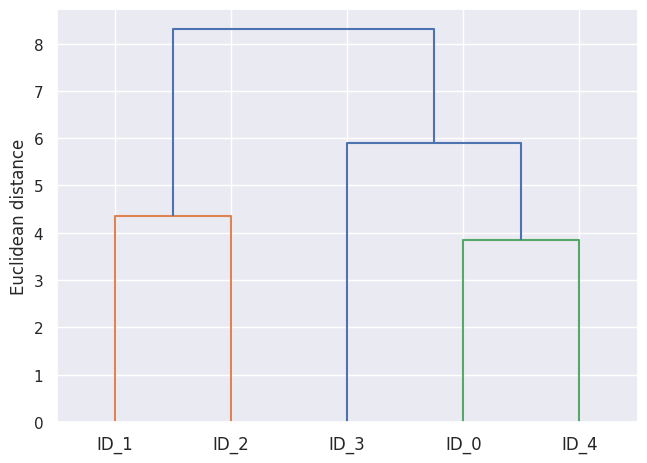

In [ ]:
#绘制层次聚类的树状图（dendrogram），以可视化聚类的结果。
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters,
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('./figures/dendrogram.png', dpi=300,
#            bbox_inches='tight')
plt.show()

## 9.3 Attaching dendrograms to a heat map

<ipython-input-7-a9c5f19f9ba6>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
<ipython-input-7-a9c5f19f9ba6>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


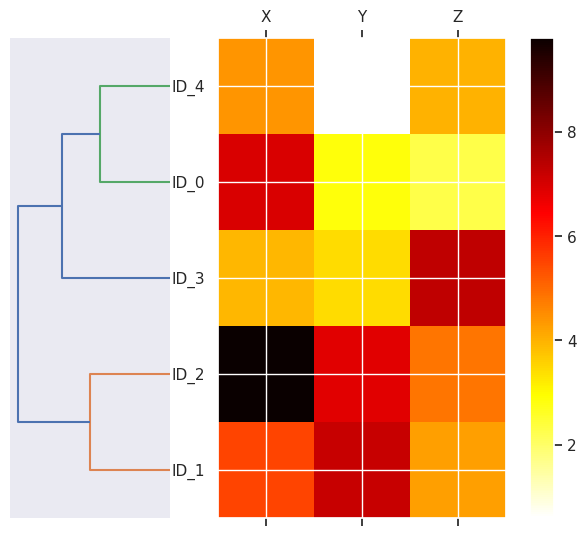

In [ ]:
# 创建一个包含树状图和热力图的图形，以可视化层次聚类的结果和相关的数据矩阵。
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.savefig('./figures/heatmap.png', dpi=300)
plt.show()

## 9.4 Applying agglomerative clustering via scikit-learn

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,   # note that we select the clusters
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)    # extract cluster labels for each observation in data
print(labels)

In [ ]:
# Make some example data...

from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()

plt.show()

In [ ]:
# K-means and hierarchical clustering:
from sklearn.cluster import KMeans

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

# 10.Text Analysis


In [ ]:
# 下载the IMDb movie review dataset
! wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解压缩
! tar -zxf aclImdb_v1.tar.gz

--2023-12-06 23:11:54--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  9.53MB/s    in 15s     

2023-12-06 23:12:10 (5.35 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



## 用load_files函数自动加载用于训练的文件夹中的数据

In [ ]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train")

text_train, y_train = reviews_train.data, reviews_train.target #text_train是评论的文本内容，y_train是标签（sentiment的值）

print("type of text_train: {}".format(type(text_train))) #text_train的数据类型，通常是一个列表，其中包含了许多文本评论
print("length of text_train: {}".format(len(text_train))) #text_train中文本评论的数量
print("text_train[6]:\n{}".format(text_train[6])) #打印了text_train中的第7个评论（Python中索引从0开始），以及该评论的文本内容

print("type of y_train: {}".format(type(y_train)))
print("length of y_train: {}".format(len(y_train)))
print("y_train[6]:\n{}".format(y_train[6]))

# 清理文本数据中的HTML标记
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

type of text_train: <class 'list'>
length of text_train: 75000
text_train[6]:
b'Gloomy Sunday - Ein Lied von Liebe und Tod directed by Rolf Sch\xc3\xbcbel in 1999 is a romantic, absorbing, beautiful, and heartbreaking movie. It started like Jules and Jim; it ended as one of Agatha Christie\'s books, and in between it said something about love, friendship, devotion, jealousy, war, Holocaust, dignity, and betrayal, and it did better than The Black Book which is much more popular. It is not perfect, and it made me, a cynic, wonder in the end on the complexity of the relationships and sensational revelations, and who is who to whom but the movie simply overwhelmed me. Perfect or not, it is unforgettable. All four actors as the parts of the tragic not even a triangle but a rectangle were terrific. I do believe that three men could fell deeply for one girl as beautiful and dignified as Ilona in a star-making performance by young Hungarian actress Erica Marozs\xc3\xa1n and who would not? The 

### 手动添加

In [ ]:
! pip install pyprind #用pip命令安装名为pyprind的Python包，该包用于在命令行中显示进度条。
import pyprind #这行代码导入pyprind包，以便在代码中使用它来显示进度条
import pandas as pd
import os #导入Python的"os"模块，用于处理文件和目录路径

basepath = 'aclImdb'
#定义了一个名为basepath的变量，该变量指定了影评数据集所在的根目录的路径，即 'aclImdb'
labels = {'pos': 1, 'neg': 0}
#创建一个名为labels的字典，用于将影评的情感标签映射为数字。
#例如，'pos'映射为1（表示正面情感），'neg'映射为0（表示负面情感）
pbar = pyprind.ProgBar(50000)
# 创建了一个名为pbar的进度条对象，用于在处理文件时显示进度条，总共要处理50000个文件。
df = pd.DataFrame()
#创建一个空的Pandas DataFrame，名为df，用于存储影评文本和情感标签。
for s in ('test', 'train'): # s代表subset
    for l in ('pos', 'neg'): # l代表lable
        path = os.path.join(basepath, s, l) #在内部，使用os.path.join函数构建每个文件的完整路径
        for file in os.listdir(path):
            with open(os.path.join(path, file), 'r') as infile:
                txt = infile.read()
            df = pd.concat([df, pd.DataFrame([[txt, labels[l]]])], ignore_index=True)
# 打开每个文件，读取其中的文本内容，并将文本内容和相应的情感标签添加到DataFrame df 中。
            pbar.update() #用于更新进度条，表示已经处理了一个文件
df.columns = ['review', 'sentiment'] #将DataFrame df 的列名设置为 'review' 和 'sentiment'



0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:47


In [ ]:
df.shape # 50000行2列
df['sentiment'].value_counts() #提取sentiment列，两列（1和0），各25000个
df.head()

,review,sentiment
0,There is something about true stories that mak...,1
1,What can be said about one of the greatest N64...,1
2,"A gruelling watch, but one of Bergman's finest...",1
3,This movie blew me away - I have only seen two...,1
4,"Gerald McRaney,(Dave Morgan),""War Crimes"",'01 ...",1


Transforming documents into feature vectors

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer #导入CountVectorizer，将文本数据转换为词袋模型

count = CountVectorizer() #创建一个名为count的CountVectorizer对象
docs = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining, the weather is sweet, and one and one is two'])
#docs是一个包含三个文本文档的NumPy数组
bag = count.fit_transform(docs)
#调用CountVectorizer对象的fit_transform方法来将文本数据转换为词袋模型
#词袋模型是一种表示文本数据的方法，它将每个文档表示为一个向量，其中包含每个单词在文档中出现的次数
print(count.vocabulary_) #打印词汇表vocabulary的内容

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


In [ ]:
count.get_feature_names_out()
#get_feature_names_out()是CountVectorizer类的方法，用于获取词袋模型中的特征名称，即单词，alphabetical顺序

array(['and', 'is', 'one', 'shining', 'sun', 'sweet', 'the', 'two',
       'weather'], dtype=object)

In [ ]:
print(bag)
#(2, 7)	1，表示第三个文档中的第8个单词（索引为7）的计数为1

  (0, 6)	1
  (0, 4)	1
  (0, 1)	1
  (0, 3)	1
  (1, 6)	1
  (1, 1)	1
  (1, 8)	1
  (1, 5)	1
  (2, 6)	2
  (2, 4)	1
  (2, 1)	3
  (2, 3)	1
  (2, 8)	1
  (2, 5)	1
  (2, 0)	2
  (2, 2)	2
  (2, 7)	1


### 基础_Bag-of-word for movie reviews

In [ ]:
#限制数据数量 以减少code running的时间
text_train = df['review']
import numpy as np
#只用前后20个reviews
text_train1 =  np.array(text_train[0:19]) #twenty reviews with negative sentiment
text_train2 = np.array(text_train[49978:49999]) #twenty reviews with positive sentiment
print(np.concatenate((text_train1, text_train2 ), axis=0).shape) #axis=0沿着数组的行方向执行，=1沿...列...
# 打印了形状，以确保 text_train 包含了所选的40个影评文本
text_train = np.concatenate((text_train1, text_train2 ), axis=0)

(40,)


In [ ]:
vect = CountVectorizer().fit(text_train)
#创建了一个CountVectorizer对象vect，并使用fit对文本数据text_train进行拟合(为每个单词分配一个唯一的索引)
X = vect.transform(text_train) #将文本数据转化为词袋模型，结果存储在变量X中
print("X:\n{}".format(repr(X)))

X:
<40x2506 sparse matrix of type '<class 'numpy.int64'>'
	with 5574 stored elements in Compressed Sparse Row format>


40行（40个文本）和2185列（2185个不同的单词数量）

X是一个稀疏矩阵（即大多数元素都是零的矩阵）

非零元素数量（4828个）

In [ ]:
#打印特征名称
feature_names = vect.get_feature_names_out() #创建feature_names对象， 通过vect对象的get_feature_names_out方法获得的特征名称列表
print("Number of features: {}".format(len(feature_names))) #特征的数量
print("First 20 features:\n{}".format(feature_names[:20])) #前20个特征
print("Features 210 to 230:\n{}".format(feature_names[210:230])) #第210个到第229个特征
print("Every 200th feature:\n{}".format(feature_names[::200])) #间隔特征

Number of features: 2506
First 20 features:
['00' '000' '00001' '007' '01' '03' '10' '102' '13' '18' '1860s' '19'
 '1963' '1990s' '1995' '1999' '19th' '20' '23rd' '25']
Features 210 to 230:
['barbarian' 'bare' 'barker' 'barrage' 'base' 'based' 'bat' 'battle'
 'battles' 'bbc' 'be' 'beast' 'beastly' 'beat' 'beating' 'beats'
 'beautiful' 'beautifully' 'beauty' 'became']
Every 200th feature:
['00' 'backdrop' 'cia' 'deputy' 'extremes' 'gruelling' 'island' 'media'
 'passable' 'refund' 'skinned' 'themselfs' 'warriors']


## 10.1 用Logistic预测positive/negative reviews

In [ ]:
#创建XY
X = X #创建X，占位符
y_1 = np.array(df['sentiment'])[0:19], #提取 'sentiment' 列的前20个值
y_2 = np.array(df['sentiment'])[49978:49999] #提取 'sentiment' 列的后20个值
y= np.append(y_1, y_2)

print(X.shape) #(40, 2787)表示40行（40个数据点），2787列（2787个特征）
print(y.shape) #(40,)表示一维数组，有40个元素（存储目标或标签）

# 创建training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(y_train.shape)

(40, 2506)
(40,)
(30, 2506)
(30,)


In [ ]:
#使用logistic模型对训练数据进行cross validation，并输出模型在CV的平均准确度分数，以评估模型的性能
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.33


In [ ]:
#用Grid Search寻找最佳参数
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Best cross-validation score: 0.40
Best parameters:  {'C': 0.001}
Test score: 0.40


### min_df

In [ ]:
#CountVectorizer+transform，将文本数据转换为特征矩阵
vect = CountVectorizer(min_df=10).fit(text_train) #CountVectorizer拟合text_train（将文本数据转换为词袋模型的表示形式）
X = vect.transform(text_train)#转换为特征矩阵
print("X with min_df: {}".format(repr(X)))
print("X shape: {}".format(X.shape))
# Logistic+GridSearch
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

X with min_df: <40x93 sparse matrix of type '<class 'numpy.int64'>'
	with 1687 stored elements in Compressed Sparse Row format>
X shape: (40, 93)
X_train shape: (30, 93)
y_train shape: (30,)
Best cross-validation score: 0.50


### stop_words

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['she', 'front', 'fire', 'give', 'anyway', 'it', 'are', 'same', 'third', 'four', 'due', 'our', 'at', 'this', 'mill', 'whole', 'otherwise', 'together', 'a', 'some', 'latterly', 'here', 'am', 'each', 'before', 'whenever', 'nor', 'over', 'sometimes', 'was', 'con', 'is']


In [ ]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X = vect.transform(text_train)
print("X with stop words:\n{}".format(repr(X_train)))
# Logistic+GridSearch
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

X with stop words:
<30x93 sparse matrix of type '<class 'numpy.int64'>'
	with 1316 stored elements in Compressed Sparse Row format>
Best cross-validation score: 0.47


### tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5, norm=None).fit(text_train)
X = vect.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_) #返回最佳超参数组合的字典
grid.best_estimator_ #返回最佳模型的实例

Best cross-validation score: 0.43
Best parameters:  {'C': 0.001}


LogisticRegression(C=0.001)

### Visualize

In [ ]:
# helper function to plot top positive and negative coefficients

def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

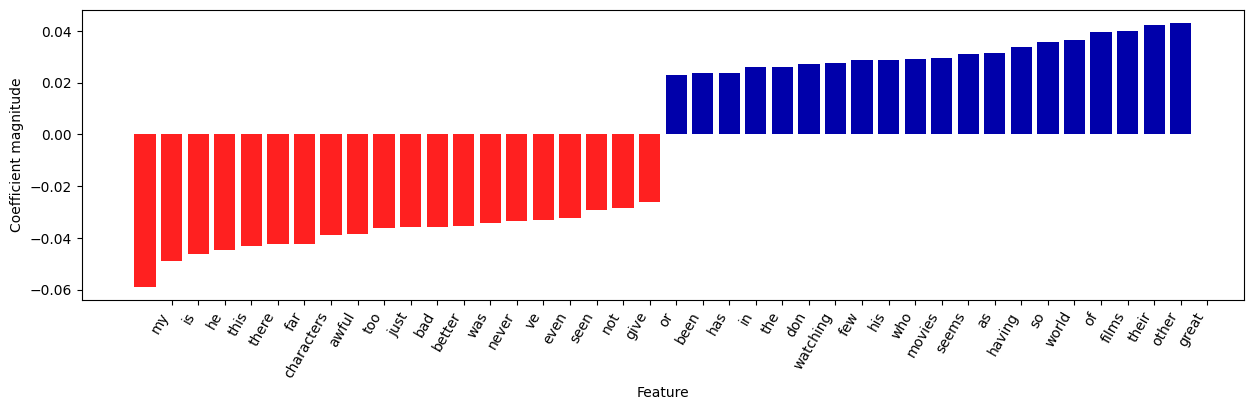

In [ ]:
import matplotlib.pyplot as plt

coefs = LogisticRegression(C=0.01).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names_out()

visualize_coefficients(coefs, feature_names, n_top_features=20)

### n-grams

In [ ]:
#导入文本数据
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [ ]:
#只考虑单个词汇，ngram_range=(1, 1)
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 13
Vocabulary:
['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [ ]:
# bi-grams
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Vocabulary size: 14
Vocabulary:
['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']
Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [ ]:
# single words, bi-grams, AND tri-grams
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 39
Vocabulary:
['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


## 10.2 tf-idf + ngram + min_d，Logistic&GridSearch，visualization

In [ ]:
vect = TfidfVectorizer(ngram_range=(1,3) ,min_df=5, norm=None).fit(text_train)
X = vect.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.43
Best parameters:
{'C': 100}


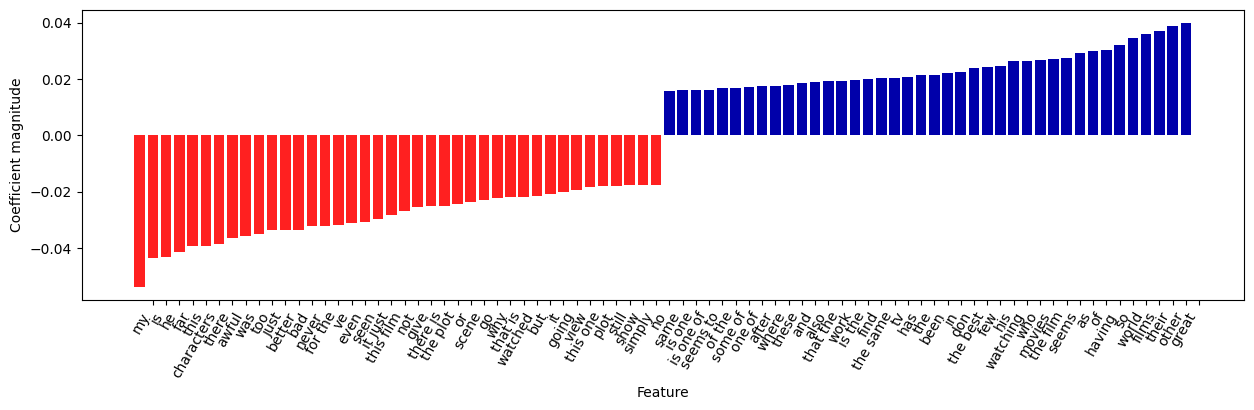

In [ ]:
coefs = LogisticRegression(C=0.01).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names_out()

visualize_coefficients(coefs, feature_names, n_top_features=40)

Best cross-validation score: 0.50
Best parameters:
{'C': 0.001}


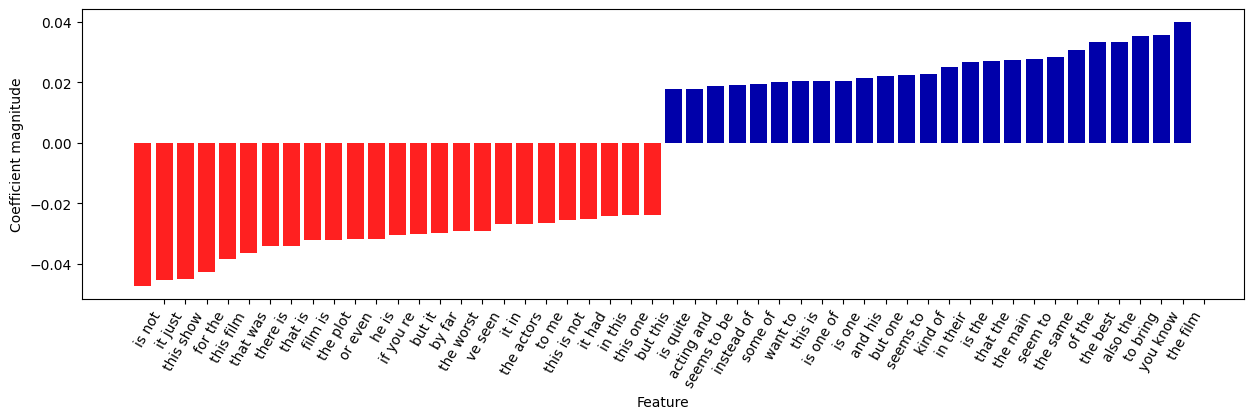

In [ ]:
# 2 and 3-gram features only

vect = TfidfVectorizer(ngram_range=(2,3) ,min_df=3, norm=None).fit(text_train)
X = vect.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

# 画图
coefs = LogisticRegression(C=0.01).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names_out()
visualize_coefficients(coefs, feature_names, n_top_features=25)

## 10.3 newsgroup_toy_example

In [20]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [21]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

In [22]:
print(f"Train len: {len(X_train)}\nTest len: {len(X_test)}")
print(f"Num Classes: {len(set(y_train))}")

Train len: 15076
Test len: 3770
Num Classes: 20


In [23]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=newsgroups.target_names)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.69

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.54      0.56      0.55       151
           comp.graphics       0.64      0.64      0.64       202
 comp.os.ms-windows.misc       0.68      0.64      0.66       195
comp.sys.ibm.pc.hardware       0.59      0.63      0.61       183
   comp.sys.mac.hardware       0.78      0.67      0.72       205
          comp.windows.x       0.79      0.75      0.77       215
            misc.forsale       0.73      0.68      0.71       193
               rec.autos       0.71      0.69      0.70       196
         rec.motorcycles       0.42      0.73      0.53       168
      rec.sport.baseball       0.80      0.82      0.81       211
        rec.sport.hockey       0.95      0.86      0.90       198
               sci.crypt       0.87      0.73      0.79       201
         sci.electronics       0.59      0.63      0.61       202
                 sci.med       0.75

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def get_plot(n_words, category_coefficients, top_coefficients_indices, top_words, category):
    plt.figure(figsize=(10, 5))
    plt.barh(range(n_words), category_coefficients[top_coefficients_indices], align='center')
    plt.yticks(range(n_words), top_words)
    plt.xlabel('Coefficient Value')
    plt.title(f'Top {n_words} Words for Category: {category}')
    plt.show()

def top_words_category(model, feature_names, categories, n_words=10):
    coefficients = model.coef_

    for i, category in enumerate(categories):
        category_coefficients = coefficients[i]

        top_coefficients_indices = np.argsort(category_coefficients)[-n_words:]

        top_words = [feature_names[idx] for idx in top_coefficients_indices]

        print(f"Top Words for {category}: {', '.join(top_words)}")

        #Optionally plot bar chart for each category
        #get_plot(n_words, category_coefficients, top_coefficients_indices, top_words, category)

feature_names = np.array(vectorizer.get_feature_names_out())
categories_to_visualize = newsgroups.target_names
top_words_category(model, feature_names, categories_to_visualize, n_words=10)

Top Words for alt.atheism: bible, morality, islam, bobby, islamic, atheist, religion, atheists, atheism, god
Top Words for comp.graphics: siggraph, animation, file, format, computer, files, images, image, 3d, graphics
Top Words for comp.os.ms-windows.misc: win3, manager, driver, ms, ax, win, cica, file, microsoft, windows
Top Words for comp.sys.ibm.pc.hardware: 486, motherboard, monitors, ide, scsi, monitor, drive, pc, card, bios
Top Words for comp.sys.mac.hardware: simms, se, macs, monitor, quadra, duo, centris, lc, apple, mac
Top Words for comp.windows.x: display, widgets, sun, mit, widget, x11r5, xterm, server, window, motif
Top Words for misc.forsale: looking, forsale, new, 00, condition, asking, sell, shipping, offer, sale
Top Words for rec.autos: mustang, auto, gt, toyota, ford, oil, dealer, engine, cars, car
Top Words for rec.motorcycles: chain, motorcycles, helmet, riding, bmw, motorcycle, ride, bikes, dod, bike
Top Words for rec.sport.baseball: braves, ball, pitcher, players, 

# 11.Imbalanced Data

## 处理方法一: 随机过采样 Random OverSampler

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 创建一些data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2, #生成5000样本,2个feature,其中2个特征对于分类是有信息量的
                           n_redundant=0, n_repeated=0, n_classes=3, #没有冗余特征,没有重复特征,3个类别
                           n_clusters_per_class=1, #每个类别内只有1个簇
                           weights=[0.01, 0.05, 0.94], #模拟不平衡样本,每个类别的样本权重分别为0.01、0.05和0.94
                           class_sep=0.8, #类别之间的距离，用于控制类别之间的可分离性。
                           random_state=0) #随机种子

In [3]:
#使用RandomOverSampler
from imblearn.over_sampling import RandomOverSampler #RandomOverSampler通过抽样处理不平衡的数据集

ros = RandomOverSampler(random_state=0) #创建一个RandomOverSampler对象ros
X_resampled, y_resampled = ros.fit_resample(X, y)
#使用fit_resample方法，将原始的特征矩阵X和标签y进行过抽样处理，得到过抽样后的特征矩阵X_resampled和标签y_resampled

print(pd.Series(y).value_counts()) #打印原始标签y中各个类别的样本数量
print(pd.Series(y_resampled).value_counts()) #打印y_resampled各个类别的样本数量
print(pd.Series(y_resampled).value_counts(normalize=True)) #打印y_resampled后各类别占比

2    4674
1     262
0      64
dtype: int64
2    4674
1    4674
0    4674
dtype: int64
2    0.333333
1    0.333333
0    0.333333
dtype: float64


### LogisticRegression



In [4]:
# original data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

logreg = LogisticRegression().fit(X,y) #创建一个LogisticRegression模型logreg并在原始数据集X和标签y上进行训练
y_pred = logreg.predict(X) #预测y

print(classification_report(y, y_pred)) #查看模型在各个类别上的精确度precision、召回率recall和F1分数等性能指标
print(logreg.score(X, y)) #查看准确率accuracy

              precision    recall  f1-score   support

           0       1.00      0.69      0.81        64
           1       0.96      0.84      0.90       262
           2       0.99      1.00      0.99      4674

    accuracy                           0.99      5000
   macro avg       0.98      0.84      0.90      5000
weighted avg       0.99      0.99      0.99      5000

0.9874


In [5]:
# resampled data

logreg = LogisticRegression().fit(X_resampled,y_resampled)
y_pred = logreg.predict(X_resampled)

print(classification_report(y_resampled, y_pred)) # precision recall and f1
print(logreg.score(X_resampled, y_resampled)) #accuracy

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      4674
           1       0.92      0.86      0.89      4674
           2       0.79      0.93      0.86      4674

    accuracy                           0.85     14022
   macro avg       0.86      0.85      0.85     14022
weighted avg       0.86      0.85      0.85     14022

0.8526601055484239


### 画图

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler


# 创建数据
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# 原数据PCA降维=>X_vis
pca = PCA(n_components=2) # 用PCA降维数据,2维方便画图展示
X_vis = pca.fit_transform(X) # 使用PCA降维,将降维后的新数据储存为X_vis

# 抽样后PCA降维=>X_res_vis
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
X_res_vis = pca.transform(X_resampled)


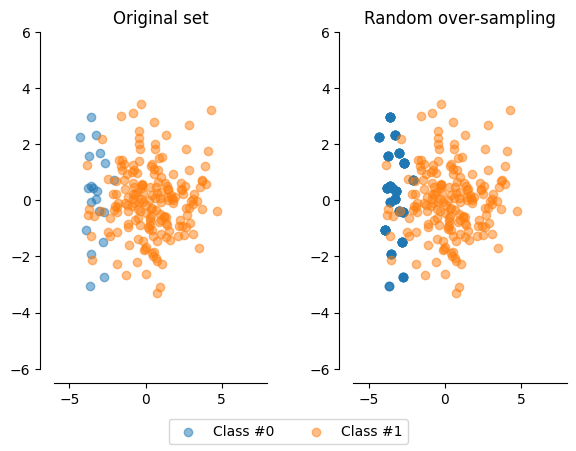

In [9]:
# 画两个图
f, (ax1, ax2) = plt.subplots(1, 2)
#创建f代表整个画布,含子图;(1, 2)指定子图的布局,即一行两列;一个子图在ax1一个在ax2

#未resample的,Original set
c0 = ax1.scatter(X_vis[y == 0, 0], #在降维后的数据集X_vis里选择标签为0的数据(y == 0);0表示作为第一个主成分上的坐标
          X_vis[y == 0, 1], #....;1表示作为第二个主成分上的坐标
          label="Class #0", #图例中的标识
          alpha=0.5) #散点的透明度

c1 = ax1.scatter(X_vis[y == 1, 0],
          X_vis[y == 1, 1],
          label="Class #1",
          alpha=0.5)

ax1.set_title('Original set')


#resample后的,Random over-sampling
ax2.scatter(X_res_vis[y_resampled == 0, 0],
            X_res_vis[y_resampled == 0, 1],
            label="Class #0",
            alpha=.5)

ax2.scatter(X_res_vis[y_resampled == 1, 0],
            X_res_vis[y_resampled == 1, 1],
            label="Class #1",
            alpha=.5)

ax2.set_title('Random over-sampling')

# 图像美化
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) #隐藏图中的上边框和右边框，以使图更干净
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()  #将X轴和Y轴的刻度线移到图的底部和左侧，使刻度线更容易观察
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10)) #将Y轴和X轴的刻度标签移到轴的外侧，增加空白边距，使图更具可读性
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6]) #设置X轴和Y轴的显示范围，即设置图的坐标轴范围


plt.figlegend((c0, c1), #添加图例（legend）到图中
       ('Class #0', 'Class #1'),
       loc='lower center', #图例的位置在图的底部中间
       ncol=2, #图例有2列
       labelspacing=0.) #标签之间的间距为0

plt.tight_layout(pad=3) #调整子图之间的布局
plt.show()

X轴Y轴分别表示第一个和第二个主成分

- 'Original set'里Class #0的数据点明显少于Class #1，表明这是一个不平衡的数据集

- 'Random over-sampling'里,
随机过抽样的目的是增加少数类（Class #0）的实例数量。
尽管进行了过抽样，Class #0看起来仍然少于Class #1。不过，与左图相比，右图中Class #0的数据点数量似乎有所增加，表明确实进行了过抽样。



## 处理方法二: 随机欠采样 Random Undersample


In [ ]:
from sklearn.datasets import make_classification

# 创建数据
X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=1000, random_state=10)

df = pd.DataFrame(X) #将特征矩阵X转换为Pandas DataFrame格式，以便后续的数据处理和可视化
df['target'] = y #将目标标签y添加为DataFrame的一列，命名为target

0    900
1    100
dtype: int64


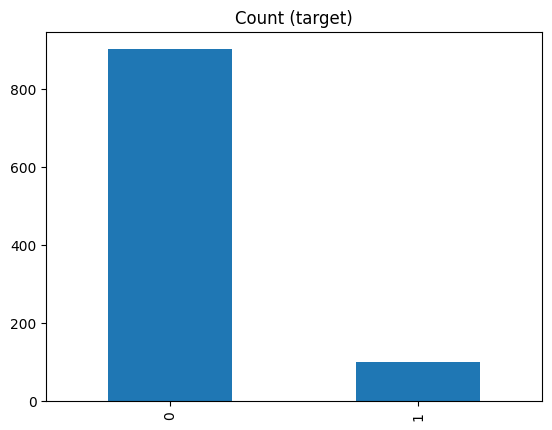

In [10]:
# 查看各个类别数量
 # 画图
df.target.value_counts().plot(kind='bar', title='Count (target)');
  # df.target：选择df中的target列
  # value_counts()：统计各个类别的样本数量。
  # plot(kind='bar', title='Count (target)')：绘制柱状图bar，图表标题为 "Count (target)"。

 # 直接查看
print(pd.Series(y).value_counts()) #打印出各个类别的样本数量

In [11]:
#使用Random UnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

0    100
1    100
dtype: int64


失去很多数据

## 处理方法三: SMOTE过采样 Synthetic Minority Over-sampling Technique

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

In [16]:
print("Original Data:\n{}".format(pd.Series(y).value_counts()))
print("New Data:\n{}".format(pd.Series(y_sm).value_counts()))

Original Data:
0    900
1    100
dtype: int64
New Data:
0    900
1    900
dtype: int64


### LogisticRegression

In [17]:
# Original data fit

logreg = LogisticRegression().fit(X,y)
y_pred = logreg.predict(X)
print(classification_report(y, y_pred))
print(logreg.score(X, y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       900
           1       0.98      0.87      0.92       100

    accuracy                           0.98      1000
   macro avg       0.98      0.93      0.96      1000
weighted avg       0.98      0.98      0.98      1000

0.985


In [18]:
#smote data fit

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

logreg = LogisticRegression().fit(X_sm,y_sm)
y_pred = logreg.predict(X_sm)
print(classification_report(y_sm, y_pred))
print(logreg.score(X_sm, y_sm))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       900
           1       0.97      0.96      0.96       900

    accuracy                           0.96      1800
   macro avg       0.97      0.97      0.96      1800
weighted avg       0.97      0.96      0.96      1800

0.965


## 处理方法四: SMOTETomek, Combination of over- and under-sampling


 SMOTE(过采样) + Tomek links(数据清理)

In [19]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_resample(X, y)

logreg = LogisticRegression().fit(X_smt,y_smt)
y_pred = logreg.predict(X_smt)

print(classification_report(y_smt, y_pred))
print(logreg.score(X_smt, y_smt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       900
           1       0.97      0.98      0.97       900

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800

0.9744444444444444


# 12.Neural Networks

## Neural_Networks_from_Scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import math

%matplotlib inline

#设置绘图
sns.set(style='whitegrid', palette='muted', font_scale=1.5) #设置Seaborn库的绘图样式,
          #背景为白色网格（'whitegrid'）
          #调色板为 'muted'（适合较为柔和的颜色）
          #字体大小为1.5倍

rcParams['figure.figsize'] = 12, 6 #设置Matplotlib图形的尺寸，图形的宽度为12，高度为6

#生成随机数
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

The sigmoid function takes a function of weights multiplied by input values (plus some bias) and converts the sum of these numbers to results between zero and one.

The sigmoid function is used quite commonly in the realm of deep learning, at least it was until recently. Here’s how it is defined:

It’s first derivative (which we will use during the backpropagation step of our training algorithm) has the following formula:

![sigmoid](https://cdn-images-1.medium.com/max/800/1*-PkQzu0E21YEbI9wvqvQzg.png)


So, the derivative can be expressed using the original sigmoid function.

![sigmoid prime](https://cdn-images-1.medium.com/max/800/1*yT0ToBoL4o9eTgph6BWx4Q.png)

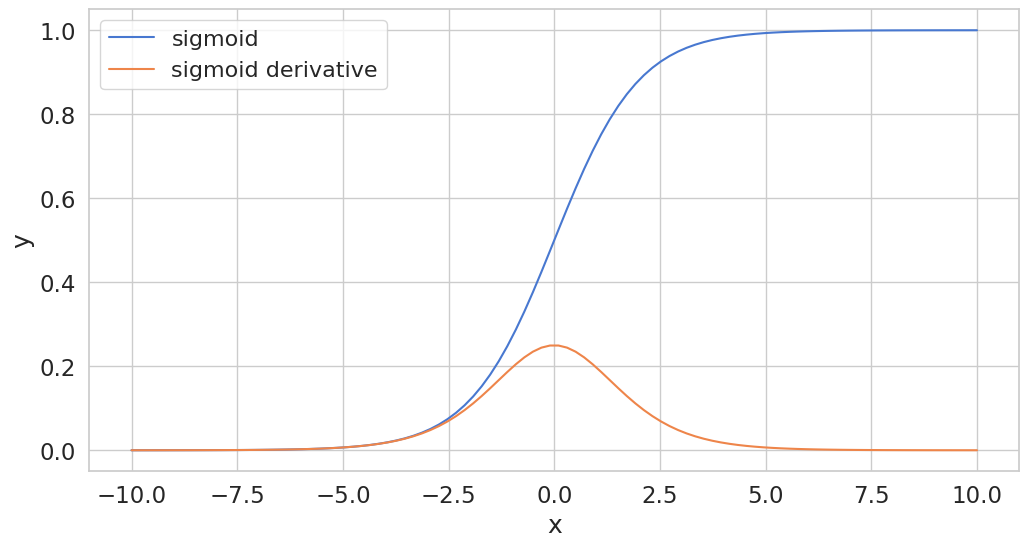

In [2]:
x = np.linspace(-10., 10., num=100)
# 创建一个包含100个均匀分布在-10到10之间的数字的NumPy一维数组

# 定义sigmoid fxn
def sigmoid (x): return 1/(1 + np.exp(-x)) #根据上面的公式定义activation function,将输入x映射到0和1之间
def sigmoid_prime(x): return sigmoid(x) * (1 - sigmoid(x)) #根据上面的公式定义derivative of sigmoid,Sigmoid函数的导数(也就是Sigmoid函数的变化率)
sig = sigmoid(x) #将sigmoid(x)的结果存储在名为sig的变量中
sig_prime = sigmoid_prime(x) #将sigmoid_prime(x)的结果存储在名为sig_prime的变量中

#画图
plt.plot(x, sig, label="sigmoid")
plt.plot(x, sig_prime, label="sigmoid derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(prop={'size' : 16})
plt.show()

In [3]:
# 定义数据库
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([ [0],   [1],   [1],   [0]])

# 设置network参数
epochs = 60 #迭代次数,Number of iterations

inputLayerSize =2 #输入层大小,2 X features
hiddenLayerSize = 3 #隐藏层大小,3 neurons in single hidden layer
outputLayerSize = 1 #输出层大小,1 neuron in output layer

# 创建一个super simple model,甚至不包含biases
# 打印Wh&Wz权重矩阵
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize)) #权重矩阵, 连接输入层与隐藏层
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize)) #权重矩阵, 连接隐藏层与输出层
print(Wh)
print(Wz)

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]]
[[0.05808361]
 [0.86617615]
 [0.60111501]]


In [4]:
H = sigmoid(np.dot(X, Wh)) #隐藏层的输出,输入数据X与权重矩阵Wh相乘,再sigmoid激活函数,表示了输入数据经过隐藏层后的表示
Z = sigmoid(np.dot(H, Wz)) #输出层的输出,将隐藏层的输出H与权重矩阵Wz相乘，再sigmoid激活函数,表示了神经网络的预测结果
E = Y - Z   #误差,通过计算Y真实值与Z预测值的差得到

print("H:\n{}".format(H)) #隐藏层的输出
print("Y:\n{}".format(Y)) #真实值
print("Z:\n{}".format(Z)) #神经网络的预测值输出
print("E:\n{}".format(E)) #误差

H:
[[0.5        0.5        0.5       ]
 [0.64534933 0.53892573 0.53891974]
 [0.59255557 0.72125881 0.67524268]
 [0.72575659 0.75151953 0.70847489]]
Y:
[[0]
 [1]
 [1]
 [0]]
Z:
[[0.68193691]
 [0.69598299]
 [0.74365508]
 [0.75379905]]
E:
[[-0.68193691]
 [ 0.30401701]
 [ 0.25634492]
 [-0.75379905]]


In [5]:
sigmoid_prime(Z) #Sigmoid函数的导数(变化率)

array([[0.22304793],
       [0.22201186],
       [0.21838908],
       [0.21759787]])

In [6]:
dZ = E * sigmoid_prime(Z)  #对输出层的输入Z的梯度（变化率）
print(dZ)

[[-0.15210462]
 [ 0.06749538]
 [ 0.05598293]
 [-0.16402506]]


In [7]:
dH = dZ.dot(Wz.T) * sigmoid_prime(H) #对隐藏层的输出H的梯度（变化率）
print(dH)

[[-0.00207621 -0.0309616  -0.02148695]
 [ 0.00088473  0.01360381  0.00944088]
 [ 0.00074554  0.01067342  0.00752249]
 [-0.00209377 -0.03094048 -0.02179785]]


In [8]:
# 权重更新
Wz +=  H.T.dot(dZ)                          # update output layer weights Wz
Wh +=  X.T.dot(dH)                          # update hidden layer weights Wh

#X.T() means we are transposing X before doing matrix multiplication
print(Wh)
print(Wz)

[[0.37319189 0.93044725 0.71771858]
 [0.59744945 0.13868197 0.14363755]]
[[-0.06027987]
 [ 0.74360898]
 [ 0.48303172]]


In [9]:
# 反向传播算法的多个迭代步骤，用于更新神经网络的权重，以便训练模型
epochs=1000
for i in range(epochs):

    H = sigmoid(np.dot(X, Wh))                  # hidden layer results
    Z = sigmoid(np.dot(H, Wz))                  # output layer results
    E = Y - Z                                   # how much we missed (error)
    dZ = E * sigmoid_prime(Z)                        # delta Z
    dH = dZ.dot(Wz.T) * sigmoid_prime(H)             # delta H
    Wz +=  H.T.dot(dZ)                          # update output layer weights
    Wh +=  X.T.dot(dH)                          # update hidden layer weights

print(np.around(Z,3))                # Resulting training prediction for each value of Y

[[0.476]
 [0.513]
 [0.5  ]
 [0.518]]


## Neural Networks with Keras

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential

# The core data structure of Keras is a model, a way to organize layers.

model = Sequential() # 模型定义,初始化了一个Sequential模型

以下代码定义了一个神经网络，包含两个隐藏层（每层 32 个神经元和 ReLU 激活函数）和一个具有 3 个神经元的输出层（使用 softmax 激活）。这种网络可用于有三个明确类别的分类任务。

### 搭建方式1: TensorFlow

In [2]:
# 使用 TensorFlow 的 Keras API 构建了一个神经网络模型

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [3]:
# 2 hidden layers

model = Sequential([
    Dense(32, input_shape=(784,)), #第一层是具有32个节点（神经元）的Dense层;784=展平的28x28像素图像
    Activation('relu'), #使用ReLU（修正线性单元）激活函数
    Dense(32), #第二层
    Activation('relu'),
    Dense(3), # 3个节点的Dense层,是输出层
    Activation('softmax'), #使用softmax激活函数,Softmax用于将输出转换为预定义类别的概率分布
])                 #由于输出层中有3个节点，模型将输出三个类别的概率

model.summary()
#这个概要为您提供了模型的一个清晰视图，包括每一层的作用和它们在模型中的贡献

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 26275 (102.64 KB)
Trainable params: 2627

In [4]:
# 3个hidden layers

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 activation_4 (Activation)   (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 activation_5 (Activation)   (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 10)               

### 搭建方式2: 逐步添加层

In [5]:
# Keras Sequential API构建神经网络的另一种方式：逐步添加层

from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=784))
#第一个Dense层(隐藏层)，具有64个神经元,ReLU激活函数
model.add(Dense(units=64, activation='relu'))
#第二个 Dense 层
model.add(Dense(units=10, activation='softmax'))
#最后一个Dense层，10类

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 配置训练 model.compile()

In [6]:
# model.compile()
# 这个方法用于配置训练过程。它接收几个关键参数，以定义模型将如何学习。

model.compile(loss='categorical_crossentropy',   #损失函数为分类交叉熵,
              optimizer='sgd',    #使用随机梯度下降（Stochastic Gradient Descent）作为优化算法
              metrics=['accuracy']) #选择了“准确度”（accuracy）作为性能评估的指标

# 损失函数可选
    #- 'categorical_crossentropy' for multiple categories
    #- 'binary_crossentropy' for binary categories
    #- 'mse' for regression, which calculates the mse

### 例子:single-input model,binary classification

In [7]:
# For a single-input model with 2 classes (binary classification):

#1. 创建模型
model = Sequential() #创建了一个顺序模型
model.add(Dense(32, activation='relu', input_dim=100))
 #添加一个32个神经元的全连接层，使用ReLU激活函数。输入特征的维度为100
model.add(Dense(1, activation='sigmoid'))
 #添加了一个单神经元的输出层，使用sigmoid激活函数。
  #在二元分类中，sigmoid 函数输出一个介于0和1之间的值，表示属于类别1的概率

#2. 编译模型
model.compile(optimizer='sgd', #优化器
              loss='binary_crossentropy', #损失函数
              metrics=['accuracy']) #评估指标,不平衡类别的情况下也可以选'AUC'（ROC曲线下的面积）

#3. 生成虚拟数据dummy data
import numpy as np
data = np.random.random((1000, 100)) # X data
# 生成一个形状为(1000, 100)的随机数组，作为特征数据（X数据）
labels = np.random.randint(2, size=(1000, 1)) # y data
# 生成一个形状为(1000, 1)的随机二元标签数组，作为目标数据（y数据）

# 4. 训练模型
model.fit(data, labels, validation_split=0.20, epochs=10, batch_size=32)
# 20%的数据用作验证集，训练10个周期，每个批次32个样本



Epoch 1/10
25/25 [==============================] - 1s 13ms/step - loss: 0.7059 - accuracy: 0.4938 - val_loss: 0.6896 - val_accuracy: 0.5100
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6983 - accuracy: 0.4950 - val_loss: 0.6912 - val_accuracy: 0.5350
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.4863 - val_loss: 0.6926 - val_accuracy: 0.5100
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.5150
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5075 - val_loss: 0.6934 - val_accuracy: 0.5150
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5125 - val_loss: 0.6935 - val_accuracy: 0.5100
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5263 - val_loss: 0.6925 - val_accuracy: 0.5300
Epoch 8/10
25/25 [=

### 例子: multiple categories

In [8]:
# for multiple categories you  need to one hot encode y using to_categorical()

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(32, activation='relu', input_dim=20))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.0001)  # define a learning rate for optimization

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128) # extract loss and accuracy from test data evaluation
print(score)

Epoch 1/20
8/8 [==============================] - 1s 6ms/step - loss: 2.3516 - accuracy: 0.1060
Epoch 2/20
8/8 [==============================] - 0s 6ms/step - loss: 2.3477 - accuracy: 0.1060
Epoch 3/20
8/8 [==============================] - 0s 9ms/step - loss: 2.3441 - accuracy: 0.1050
Epoch 4/20
8/8 [==============================] - 0s 6ms/step - loss: 2.3407 - accuracy: 0.1080
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 2.3377 - accuracy: 0.1080
Epoch 6/20
8/8 [==============================] - 0s 10ms/step - loss: 2.3351 - accuracy: 0.1080
Epoch 7/20
8/8 [==============================] - 0s 7ms/step - loss: 2.3327 - accuracy: 0.1040
Epoch 8/20
8/8 [==============================] - 0s 5ms/step - loss: 2.3305 - accuracy: 0.1050
Epoch 9/20
8/8 [==============================] - 0s 7ms/step - loss: 2.3285 - accuracy: 0.1080
Epoch 10/20
8/8 [==============================] - 0s 5ms/step - loss: 2.3267 - accuracy: 0.1110
Epoch 11/20
8/8 [=====================

In [9]:
import numpy as np

# Prediction from keras classification model
print(x_test.shape)


# for predicted probabilities
ypreds = model.predict(x_test)
#print(ypreds) #gives prediction of each category, largest is selected for predict_classes()


# for predicted label index of one hot encoded y data columns
# Can use this to return correct label from well ordered list of labels
ypreds_classindex = np.argmax(model.predict(x_test), axis=-1)
print(ypreds_classindex)


(100, 20)
4/4 [==============================] - 0s 3ms/step
[4 1 8 1 8 1 0 8 8 6 4 4 1 8 1 1 5 1 7 8 1 1 8 4 1 7 3 4 5 4 1 8 0 0 1 4 1
 5 5 4 1 1 8 1 8 1 1 4 8 5 8 1 1 5 1 1 5 4 8 5 8 1 7 1 5 1 5 2 8 8 1 8 5 8
 4 8 1 8 7 4 1 1 8 1 7 1 8 7 8 4 1 0 8 8 8 8 1 8 1 8]


In [10]:
labels=["label1","label2"]

labels[1] #结果是lable2因为列表的索引是从 0 开始的






'label2'

In [11]:
# Prediction from keras regression model

# for predicted probabilities and labels
ypreds = model.predict(x_test)

# What is the index location of the column with the largest probability?
ypreds[0].argmax()


4/4 [==============================] - 0s 7ms/step


4

### 例子:Iris dataset

In [12]:

import pandas as pd

data = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")


#update data to set up for train test split
data = data.iloc[:,1:]
y = data['Species']
X = data.loc[:, data.columns != 'Species']

display(pd.get_dummies(y))
display(data.head())
display(X.head())
display(y[0::10])


,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0          setosa
10         setosa
20         setosa
30         setosa
40         setosa
50     versicolor
60     versicolor
70     versicolor
80     versicolor
90     versicolor
100     virginica
110     virginica
120     virginica
130     virginica
140     virginica
Name: Species, dtype: object

In [13]:
! pip install aimodelshare


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.8/975.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.7/454.7 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.7/294.7 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 

# Manifold-Learning 高纬数据降维



这段文字介绍了主成分分析（PCA）在降维任务中的应用——减少数据集的特征数量，同时保持数据点之间的基本关系。虽然 PCA 灵活、快速且易于解释，但当数据中存在非线性关系时，它的表现并不那么好。下面我们将看到一些这方面的示例。

为了解决这个不足，我们可以转向一类被称为流形学习的方法——这是一类无监督估计器，旨在将数据集描述为嵌入在高维空间中的低维流形。
当你想到流形时，我建议你想象一张纸：这是一个二维对象，存在于我们熟悉的三维世界中，并且可以在那个二维中被弯曲或卷起。
在流形学习的术语中，我们可以将这张纸视为嵌入在三维空间中的二维流形。

在三维空间中旋转、重新定向或拉伸纸张并不会改变纸张的平坦几何形状：这些操作类似于线性嵌入。
如果你弯曲、卷曲或揉皱纸张，它仍然是一个二维流形，但嵌入到三维空间中的方式不再是线性的。
流形学习算法将寻求了解纸张的基本二维本质，即使它被扭曲以填满三维空间。

在这里，我们将展示一些流形方法，重点介绍几种技术：多维缩放（MDS）、局部线性嵌入（LLE）和等距映射（IsoMap）。

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [7]:
# 创建并保存带有“HELLO”文字的图像
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)

# 从保存的图像中提取数据:
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
# 生成随机点并应用到图像数据上:
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

# 返还数据
    return X[np.argsort(X[:, 0])]

<ipython-input-8-502e5018f5b1>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))


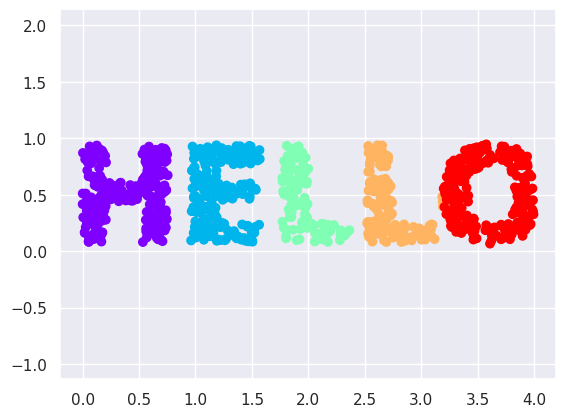

In [8]:
# visualization

X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [9]:
X
#The output is two dimensional, and consists of points drawn in the shape of the word, "HELLO".
#This data form will help us to see visually what these algorithms are doing.

array([[4.65390215e-05, 4.16565828e-01],
       [5.38772018e-04, 5.11129139e-01],
       [2.61356305e-03, 8.70669034e-01],
       ...,
       [3.99099756e+00, 4.51739476e-01],
       [3.99173644e+00, 3.50711815e-01],
       [3.99557045e+00, 3.26639249e-01]])

## 技术一: Multidimensional Scaling (MDS,多维尺度分析),降维

流形学习估计器的目标：对于给定的高维嵌入数据，它寻求数据的低维表示，以保持数据内部的某些关系。



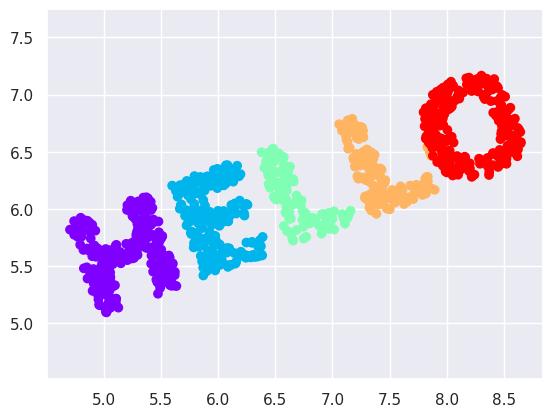

In [10]:
# 对二维点集 X 进行旋转和平移

# 旋转
def rotate(X, angle): #定义rotate函数有两个参数
    theta = np.deg2rad(angle) #将输入的角度angle转换为弧度
    R = [[np.cos(theta), np.sin(theta)], #创建一个旋转矩阵R
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R) #将输入的点集X与旋转矩阵R相乘，从而对点集X中的每个点执行了旋转操作

# 平移,坐标增加(5,5)
X2 = rotate(X, 20) + 5

# 画图
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

In [11]:
# 计算点集X中每两个点之间的距离，并将这些距离保存在矩阵D中
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

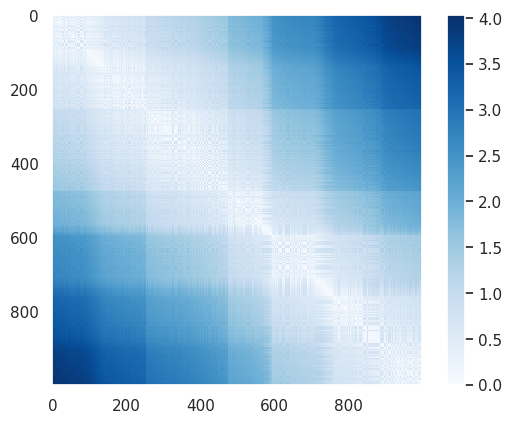

In [12]:
# 可视化之前计算得到的距离矩阵D
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [13]:
# 比较经过旋转和平移操作后的点集X2的距离矩阵D2是否与原始点集X的距离矩阵D相等
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


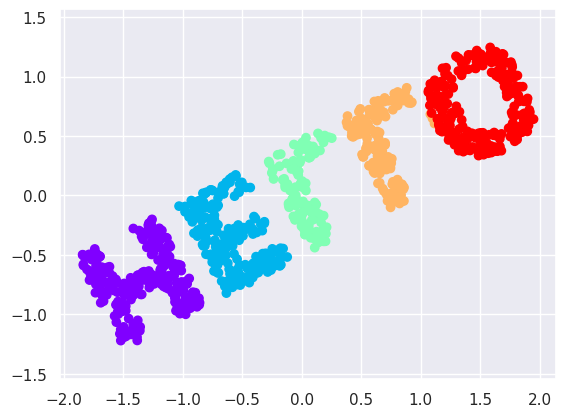

In [15]:
# 可视化经过旋转和平移操作后的点集X2
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)

out = model.fit_transform(D2)

plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [16]:
# 将输入的二维点集X投影到更低维度的空间中，并返回投影后的点集

def random_projection(X, dimension=3, rseed=42): #X二维点集,投影后的维度是3,随机数生成器的种子42
    assert dimension >= X.shape[1] #确保目标维度 dimension 大于等于输入点集 X 的原始维度
    rng = np.random.RandomState(rseed) #确保投影具有可重复性
    C = rng.randn(dimension, dimension) #随机矩阵C用于执行随机投影
    e, V = np.linalg.eigh(np.dot(C, C.T)) #C矩阵的特征值保存在e中，特征向量保存在V中
    return np.dot(X, V[:X.shape[1]]) #返回投影后的点集X3

X3 = random_projection(X, 3)
X3.shape

(1000, 3)

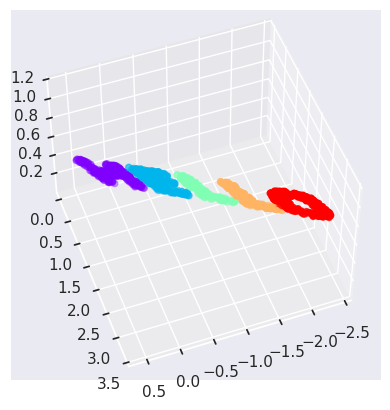

In [17]:
# 可视化经过随机投影后的点集X3
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


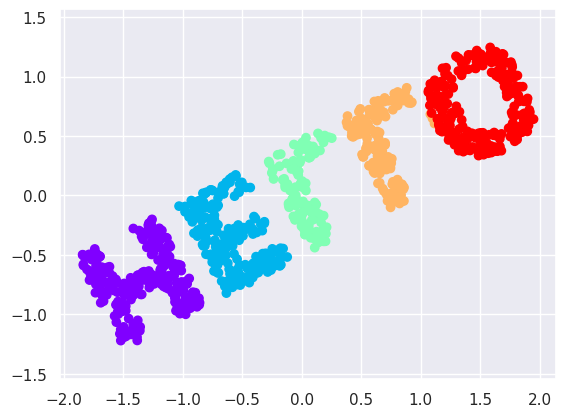

In [18]:
# 使用MDS对经过随机投影后的点集X3进行降维并可视化

model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

## MDS无法处理Nonlinear Embeddings

In [19]:
# 类似 "S" 形曲线的三维点集XS

def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

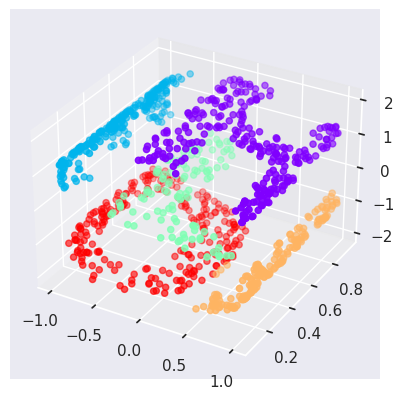

In [20]:
# 可视化
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


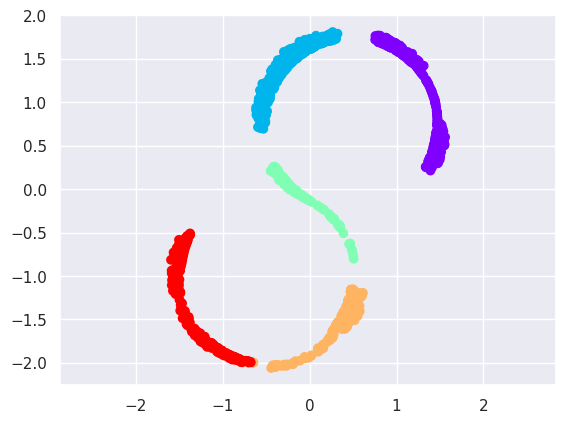

In [21]:
# 用MDS对XS降维

from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

MDS给的最佳的二维线性嵌入并不是将S形曲线展开，而是抛弃了原始的y轴

## 技术二: Locally Linear Embedding (LLE),处理nonlinear embedding

In [22]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/figures/05.10-LLE-vs-MDS.png")

在这里，每条淡色线代表了在嵌入中应该保持的距离。

- 左侧是MDS使用的模型的表示：它试图保持数据集中**每对点之间的距离**。

- 右侧是一种称为局部线性嵌入（Locally Linear Embedding，简称LLE）的流形学习算法所使用的模型的表示：与其保持所有距离不同，它试图**仅保持相邻点之间的距离**，即每个点的最近100个邻居之间的距离。

思考左侧面板，我们可以看到为什么MDS失败了：在适当保持两点之间的每条线的长度的情况下，无法将这些数据展平。

另一方面，对于右侧面板，情况看起来更加乐观。我们可以想象以一种方式展开数据，以保持线的长度大致相同。
这正是LLE所做的，通过全局优化反映这一逻辑的成本函数。

LLE有许多不同的变体；在这里，我们将使用修改的LLE算法来恢复嵌入的二维流形。
一般来说，修改的LLE在恢复具有很少畸变的明确定义的流形方面比算法的其他变体做得更好：

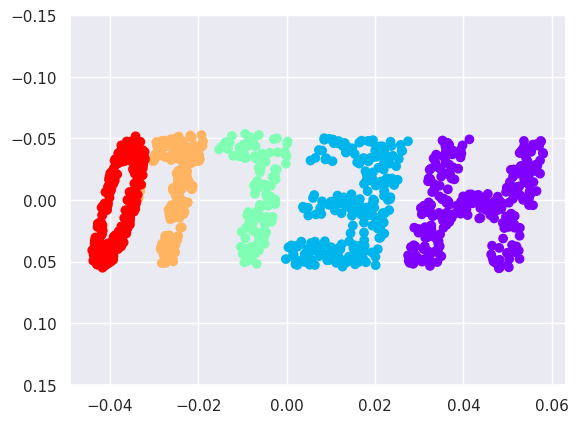

In [23]:
# 用LLE三维点集XS进行降维，并可视化降维后的结果

from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

虽然 somewhat distorted,但依旧captures the essential relationships in the data!

## Example: Isomap on Faces



In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape #有2,370张图像，每张图像有2,914个像素,每个图像可以被看作是一个2,914维空间中的数据点！

(2370, 2914)

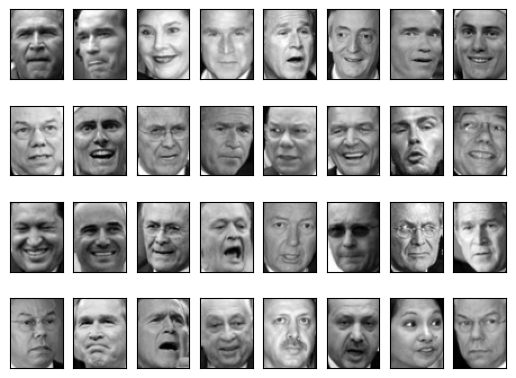

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

### PCA降维失败

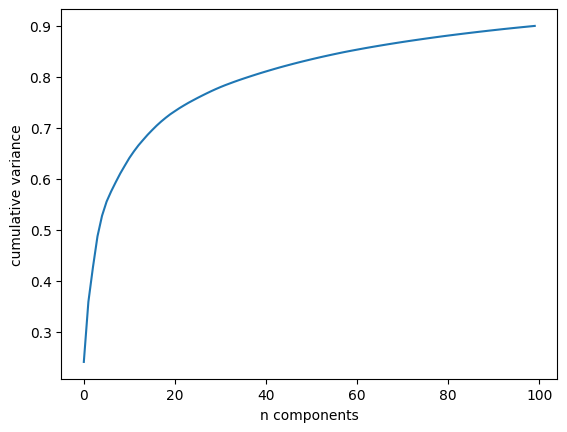

In [7]:
# 用PCA降维数据,并绘制解释方差比例的累积图
import numpy as np

from sklearn.decomposition import PCA
model = PCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

# 结果是需要近100个主成分来保留90%的方差。这告诉我们数据在本质上是非常高维的,所以用LLE处理

### LLE降维

In [8]:
from sklearn.manifold import Isomap #Isomap是一种用于非线性降维的算法
model = Isomap(n_components=2) #创建了一个Isomap模型，指定了降维后的目标维度为2维，因此我们希望将数据投影到一个二维空间中
proj = model.fit_transform(faces.data) #使用Isomap模型对人脸数据集 faces.data 进行降维操作，并将降维后的结果保存在 proj 中
proj.shape #有2370个样本点，每个样本点都有2个特征维度

(2370, 2)

In [9]:
# 绘制降维后的数据点
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()

    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

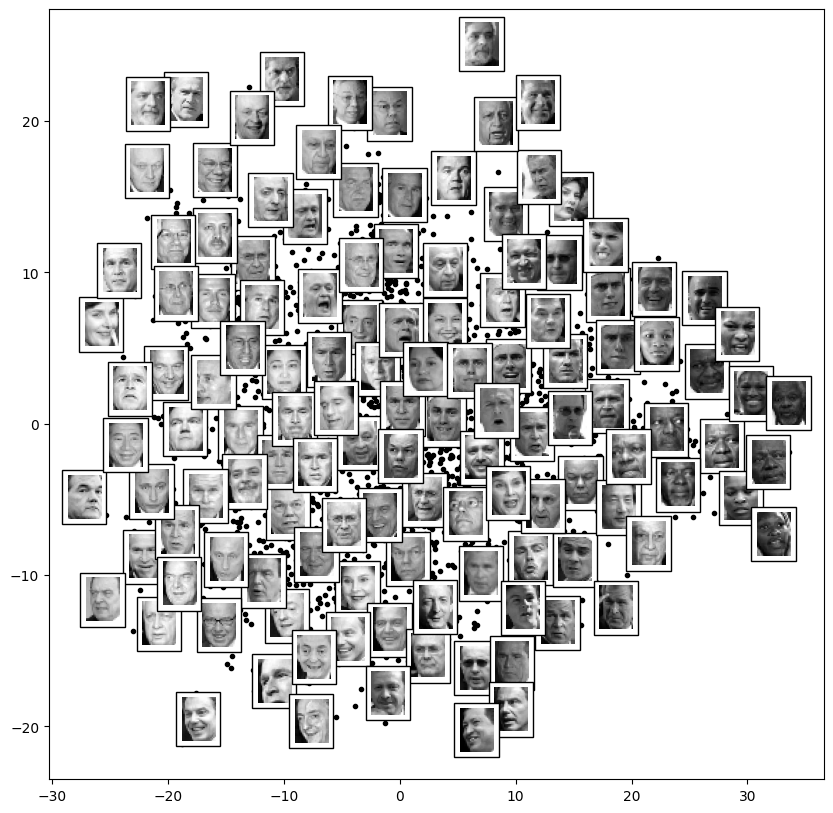

In [12]:
from matplotlib import offsetbox

fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

结果很有趣：Isomap的前两个维度似乎描述了全局图像特征：从左到右是图像的整体亮度或深暗程度，从底部到顶部是脸部的一般方向。
这为我们提供了一种很好的视觉指示，展示了数据中一些基本特征。

然后，我们可以继续对这些数据进行分类（也许使用流形特征作为分类算法的输入）。

# Convolution Nets for MNIST

Convolutional Neural Networks，CNN, 卷积神经网络是一种在图像处理和计算机视觉领域广泛应用的深度学习模型。

MNIST 数据集是一个经典的手写数字识别数据集，包含了大量手写数字图

## 前期数据

In [22]:
#导入 libraries
import numpy as np
import tensorflow as tf

################Note that we are using tf.keras, not keras!#####################################
import tensorflow.keras as keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from keras.layers import Conv2D
from keras.layers import MaxPooling2D

import pandas as pd
from tensorflow.keras.optimizers import SGD

In [23]:
#导入数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [24]:
#data preparation
from tensorflow.keras import backend as K
# Doing some prep for image data example here

img_rows, img_cols = 28, 28
# 定义图像的行数和列数，通常用于处理MNIST数据集，其中图像大小为28x28像素

if K.image_data_format() == 'channels_first':
# 查Keras后端的图像数据格式是否为'channels_firs
    shape_ord = (1, img_rows, img_cols)
else:
    shape_ord = (img_rows, img_cols, 1)
# 根据图像数据格式的不同，分别定义了shape_ord的值。
# 如果是'channels_first'格式，图像数据的形状为(1, img_rows, img_cols)，表示通道数为1；
# 如果是'channel_last'格式，图像数据的形状为(img_rows, img_cols, 1)，同样表示通道数为1。

print(shape_ord)  # Height, Width, and Depth of input image data

(28, 28, 1)


In [25]:
# Preprocess and Normalise Data

 # 将训练集（X_train）和测试集（X_test）中的图像数据进行重塑，使其符合之前定义的图像数据形状shape_ord
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)
 # 将图像数据的数据类型转换为浮点型（'float32'）
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

 # 打印出训练集中图像像素的最大值,通常图像像素的值范围在0到255之间，表示灰度值
print(np.amax(X_train))

28, 28
X_train /= 255 # /= takes X_train and divides by 255
X_test /= 255  # /= takes X_test and divides by 255

255.0


In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# X_train.shape (60000, 28, 28, 1)表示
 # 60000个图像样本，每个图像样本的尺寸为28x28像素，
 # 且每个图像具有1个通道（通常表示灰度图像）

# y_train.shape (60000,)表示
 # 60000个标签

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [28]:
X_train.max() #这些像素值中的最大值,像素值的最大亮度或强度

1.0

In [30]:
nb_classes = 10 #定义了类别的数量

#独热编码,将每个类别转化为一个二进制向量，其中只有一个元素为1，表示所属的类别，其他元素为0
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

Y_train.shape
Y_test.shape

(10000, 10)

## A simple CNN卷积神经网络

In [32]:
# 初始化卷积神经网络的相关参数和优化器
nb_epoch = 5  #训练的轮数（或称为周期数）
batch_size = 64 #表示每个小批次（batch）中包含的样本数量
nb_filters = 32 #卷积层中的滤波器（卷积核）数量

nb_pool = 2 #池化层中池化窗口的大小,池化操作用于减小特征图的尺寸
nb_conv = 3 #卷积核的大小
sgd = SGD(learning_rate=0.1) #随机梯度下降（SGD）优化器的初始化,学习率为0.1

In [33]:
shape_ord #表示图像的高度、宽度和通道数

(28, 28, 1)

## 第一步: Model Definition

In [35]:
# 定义了一个卷积神经网络（Convolutional Neural Network，CNN）的模型，并按顺序添加了不同的层
model = Sequential()

model.add(Conv2D(32, (3, 3), #添加了一个卷积层Conv2D,卷积核的数量32,卷积核的大小3x3
      padding='valid', #填充方式为 "valid"，表示不进行填充
      input_shape=(28,28,1))) #输入数据的形状，即图像的高度为28像素，宽度为28像素，通道数为1（因为是灰度图像）
model.add(Activation('relu')) #激活函数
model.add(Flatten()) #添加一个展平层
model.add(Dense(nb_classes)) #添加一个全连接层Dense
model.add(Activation('softmax')) #添加了一个激活函数层softmax

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                216330    
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 216650 (846.29 KB)
Trainable params: 216650 (846.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 第二步: Compile

In [38]:
# 设置了模型的损失函数、优化器和评估指标
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

## 第三步: Fit


In [39]:
hist = model.fit(X_train, Y_train, batch_size=batch_size,
                 epochs=nb_epoch, verbose=1,
                 validation_split=.2) #表示将训练集的20%数据用作验证集

Epoch 1/5
750/750 [==============================] - 28s 35ms/step - loss: 0.3767 - accuracy: 0.8894 - val_loss: 0.2075 - val_accuracy: 0.9436
Epoch 2/5
750/750 [==============================] - 17s 23ms/step - loss: 0.1612 - accuracy: 0.9547 - val_loss: 0.1187 - val_accuracy: 0.9686
Epoch 3/5
750/750 [==============================] - 23s 30ms/step - loss: 0.1006 - accuracy: 0.9713 - val_loss: 0.0973 - val_accuracy: 0.9735
Epoch 4/5
750/750 [==============================] - 27s 37ms/step - loss: 0.0772 - accuracy: 0.9776 - val_loss: 0.0835 - val_accuracy: 0.9768
Epoch 5/5
750/750 [==============================] - 25s 34ms/step - loss: 0.0639 - accuracy: 0.9812 - val_loss: 0.0814 - val_accuracy: 0.9783


## 画图

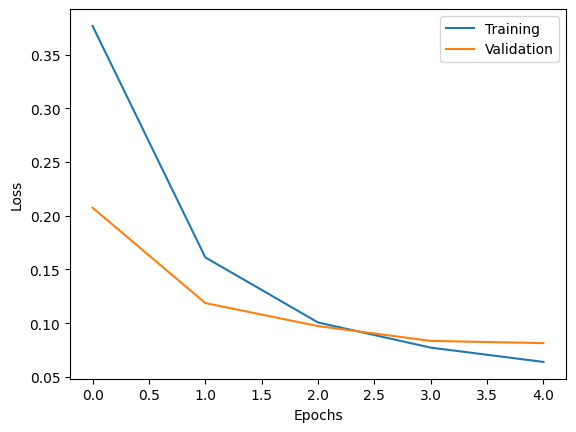

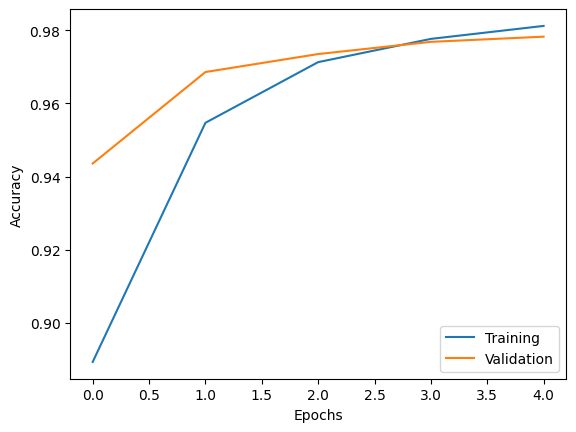

In [40]:
#绘制loss and accuracy at each epoch
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

## 第四步: Evaluate

In [41]:
print('Available Metrics in Model: {}'.format(model.metrics_names))

Available Metrics in Model: ['loss', 'accuracy']


In [42]:
# Evaluating the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.07179468125104904
Test Accuracy: 0.9769999980926514


## 增加Dense Layers

In [43]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size,
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
938/938 [==============================] - 148s 157ms/step - loss: 0.4098 - accuracy: 0.8834 - val_loss: 0.2050 - val_accuracy: 0.9379
Epoch 2/5
938/938 [==============================] - 99s 105ms/step - loss: 0.1722 - accuracy: 0.9483 - val_loss: 0.1346 - val_accuracy: 0.9585
Epoch 3/5
938/938 [==============================] - 101s 107ms/step - loss: 0.1302 - accuracy: 0.9614 - val_loss: 0.1217 - val_accuracy: 0.9624
Epoch 4/5
938/938 [==============================] - 96s 103ms/step - loss: 0.1083 - accuracy: 0.9672 - val_loss: 0.0988 - val_accuracy: 0.9697
Epoch 5/5
938/938 [==============================] - 100s 107ms/step - loss: 0.0942 - accuracy: 0.9712 - val_loss: 0.0902 - val_accuracy: 0.9702


In [45]:
#Evaluating the model on the test data
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.09020119160413742
Test accuracy: 0.9702000021934509


## 增加Convolution Layers and Max Pooling

In [46]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size,
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
938/938 [==============================] - 42s 44ms/step - loss: 0.8352 - accuracy: 0.7569 - val_loss: 0.2450 - val_accuracy: 0.9291
Epoch 2/5
938/938 [==============================] - 76s 81ms/step - loss: 0.2213 - accuracy: 0.9340 - val_loss: 0.1618 - val_accuracy: 0.9526
Epoch 3/5
938/938 [==============================] - 73s 78ms/step - loss: 0.1529 - accuracy: 0.9544 - val_loss: 0.1475 - val_accuracy: 0.9503
Epoch 4/5
938/938 [==============================] - 55s 59ms/step - loss: 0.1206 - accuracy: 0.9634 - val_loss: 0.1119 - val_accuracy: 0.9626
Epoch 5/5
938/938 [==============================] - 38s 41ms/step - loss: 0.1012 - accuracy: 0.9705 - val_loss: 0.0889 - val_accuracy: 0.9727


In [48]:
#Evaluating the model on the test data
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.0889473557472229
Test accuracy: 0.9726999998092651


## 练习

In [49]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model():
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation('relu'))
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size,
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))


    #Evaluating the model on the test data
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)

In [50]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model() # time a single loop of the model in the function.

Epoch 1/5
938/938 [==============================] - 88s 93ms/step - loss: 0.5279 - accuracy: 0.8526 - val_loss: 0.2234 - val_accuracy: 0.9336
Epoch 2/5
938/938 [==============================] - 138s 147ms/step - loss: 0.2053 - accuracy: 0.9386 - val_loss: 0.2289 - val_accuracy: 0.9248
Epoch 3/5
938/938 [==============================] - 132s 141ms/step - loss: 0.1543 - accuracy: 0.9538 - val_loss: 0.1879 - val_accuracy: 0.9426
Epoch 4/5
938/938 [==============================] - 89s 94ms/step - loss: 0.1248 - accuracy: 0.9629 - val_loss: 0.1059 - val_accuracy: 0.9674
Epoch 5/5
938/938 [==============================] - 87s 93ms/step - loss: 0.1074 - accuracy: 0.9678 - val_loss: 0.1386 - val_accuracy: 0.9555
Test score: 0.13855434954166412
Test accuracy: 0.9555000066757202
8min 58s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
model.save("hand_written_digits_keras.h5") # save model to single HDF5 file

In [ ]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
modelload = load_model("hand_written_digits_keras.h5")

In [ ]:
from skimage import io
from skimage.transform import rescale,resize
import numpy
from skimage.color import rgb2gray
image_file_type="jpg"

img = io.imread("img_2.jpg")

fixed_size=(32,32)
#img=reshape(img,-1)
resized_image=resize(img, fixed_size) #reshaping image

resized_image.shape

In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import numpy as np


fixed_size=(28,28)

def load_image(img_path, fixed_size,show=False):
    img = image.load_img(img_path, target_size=fixed_size,color_mode='grayscale')
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)
             # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor = (img_tensor-1/(255-1)     # models expect values between 0,1
    return img_tensor


# load model
modelload = load_model("hand_written_digits_keras.h5")

# image path
img_path = 'img_2.jpg'

# load a single image
new_image = load_image(img_path, fixed_size)

# check prediction
modelload.predict_classes(new_image)

In [ ]:
# What would color image preprocessing look like?

# Import image, load to array of shape height, width, channels, then min/max transform.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def load_image(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-np.float32(img).min())/(np.float32(img).max()-np.float32(img).min()) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img

In [ ]:

# read in all images from filenames

preprocessed_image_data=list(map(load_image, listoffilepaths))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

## color example

### 1.Preprocessor Function & Setup

In [ ]:
# Importing images from tensorflow compressed .tgz file...
FLOWERS_DIR = 'flower_photos' # Downloading to this directory drom the download URL.
def download_images():
  """If the images aren't already downloaded, save them to FLOWERS_DIR."""
  if not os.path.exists(FLOWERS_DIR):
    DOWNLOAD_URL = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
    print('Downloading flower images from %s...' % DOWNLOAD_URL)
    urllib.request.urlretrieve(DOWNLOAD_URL, 'flower_photos.tgz') # Like ```urlopen```.
    !tar xfz flower_photos.tgz
  print('Flower photos are located in %s' % FLOWERS_DIR)

import os
from six.moves import urllib

# Download the images to flower_photos folder...
download_images()

In [ ]:
# Extracting all filepaths iteratively...
base_path = 'flower_photos'
categories = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Load file paths to fnames list object...
fnames = []
for category in categories:
    flower_folder = os.path.join(base_path, category)
    file_names = os.listdir(flower_folder)
    full_path = [os.path.join(flower_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

# print('number of images for each category:', [len(f) for f in fnames])
# print(fnames[0:4]) # Examples of file names...

In [ ]:
fnames[1]

In [ ]:
def preprocessor(data, shape=(192, 192)):
        """
        This function preprocesses reads in images, resizes them to a fixed shape and
        min/max transforms them before converting feature values to float32 numeric values
        required by onnx files.

        params:
            data
                list of unprocessed images

        returns:
            X
                numpy array of preprocessed image data

        """

        import cv2
        import numpy as np

        "Resize a color image and min/max transform the image"
        img = cv2.imread(data) # Read in image from filepath.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2 reads in images in order of blue green and red, we reverse the order for ML.
        img = cv2.resize(img, shape) # Change height and width of image.
        img = img / 255.0 # Min-max transform.


        # Resize all the images...
        X = np.array(img)
        X = np.expand_dims(X, axis=0) # Expand dims to add "1" to object shape [1, h, w, channels].
        X = np.array(X, dtype=np.float32) # Final shape for onnx runtime.
        return X

### Write a Preprocessor Function

In [ ]:
def preprocessor(data, shape=(192, 192)):
        """
        This function preprocesses reads in images, resizes them to a fixed shape and
        min/max transforms them before converting feature values to float32 numeric values
        required by onnx files.

        params:
            data
                list of unprocessed images

        returns:
            X
                numpy array of preprocessed image data

        """

        import cv2
        import numpy as np

        "Resize a color image and min/max transform the image"
        img = cv2.imread(data) # Read in image from filepath.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2 reads in images in order of blue green and red, we reverse the order for ML.
        img = cv2.resize(img, shape) # Change height and width of image.
        img = img / 255.0 # Min-max transform.


        # Resize all the images...
        X = np.array(img)
        X = np.expand_dims(X, axis=0) # Expand dims to add "1" to object shape [1, h, w, channels].
        X = np.array(X, dtype=np.float32) # Final shape for onnx runtime.
        return X

In [ ]:
import numpy as np

# Import image, load to array of shape height, width, channels, then min/max transform...

# Read in all images from filenames...
preprocessed_image_data = [preprocessor(x) for x in fnames[0] + fnames[1] + fnames[2] + fnames[3] + fnames[4]]

# Object needs to be an array rather than a list for Keras. (vstack converts above list to array object.)
X = np.vstack(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model.

In [ ]:
X.shape

In [ ]:
print(len(preprocessed_image_data)) # Same number of elements as filenames.
print(preprocessed_image_data[0].shape) # Dimensions now 192, 192, 3 for all images.
print(preprocessed_image_data[0].min()) # Min value of every image is zero.
print(preprocessed_image_data[0].max()) # Max value of every image is one
X.shape

In [ ]:
# Create y data made up of correctly ordered labels from file folders...
from itertools import repeat

daisy = list(repeat("daisy", 633)) #i.e.: 633 filenames in daisy folder
dandelion = list(repeat("dandelion", 898))
roses = list(repeat("roses", 641))
sunflowers = list(repeat("sunflowers", 699))
tulips = list(repeat("tulips", 799))

# Combine into single list of y labels...
y_labels = daisy + dandelion + roses + sunflowers + tulips

# Check length, same as X above...
len(y_labels)

# Need to one-hot encode for Keras. Let's use Pandas...
import pandas as pd
y = pd.get_dummies(y_labels)
display(y)

In [ ]:
len(fnames[0])

In [ ]:
# Visualize images...
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(7, 15)
for i in range(5):
    for j in range (2):
        l = np.random.randint(0, len(y_labels))
        ax[i, j].imshow(X[l])
        ax[i, j].set_title('Flower: ' + y_labels[l])

plt.tight_layout()

In [ ]:
# train_test_split resized images...
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 1987)
y_train

### 2.Train Model

### Keras Convolutional Neural Network

In [ ]:

# Let's build a convnet model...
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
import tensorflow as tf
with tf.device('/device:GPU:0'): # "/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

        model = Sequential()
        model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=[192, 192, 3]))
        model.add(MaxPooling2D(pool_size=2))

        model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=2))

        model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=2))

        model.add(Flatten())
        model.add(Dense(100, activation='relu')) # One fully-connected layer of 100 neurons.

        model.add(Dense(5, activation='softmax')) # Last fully-connected layer of 5 outputs (5 categories).

        # Compile model...
        model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

        # Fitting the NN to the Training set...
        model.fit(X_train, y_train,
                          epochs=1, verbose=1, validation_data=(X_test, y_test))

In [ ]:
#Create list of predicted labels to submit to flower model competition using...
#aimodelshare submit_model() function
# format y_pred as labels
y_pred = model.predict(X_test).argmax(axis=1)
predicted_labels = [y_test.columns[i] for i in y_pred]
predicted_labels[0:5]

In [ ]:
model.predict(X_test).argmax(axis=1)

# 数据集

Print函数


In [ ]:
print("A:\n{}".format(A))

## 手写数字

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

# set up the figure
fig = plt.figure(figsize=(6, 6))  # 图形的宽度和高度都为6英寸
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# 控制子图在图形的水平方向上的位置，left 表示最左边的位置，right 表示最右边的位置。在这里，设置为0和1，表示子图覆盖整个图形。
# 控制子图在图形的垂直方向上的位置，bottom 表示最底部的位置，top 表示最顶部的位置。同样，设置为0和1表示子图覆盖整个图形。
# 控制子图之间的水平和垂直间距。在这里，设置为0.05，表示子图之间有一小段间距，以便更好地布局子图。

# plot the digits: each image is 8x8 pixels
for i in range(64): #迭代64次，因为手写数字数据集 digits 中包含了64个手写数字图像。
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))